In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0) #To display entire text content of a column
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics import precision_score, recall_score, f1_score
import timeit
import os
import pickle
import joblib as joblib
import re
from functools import reduce
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import twint
import nest_asyncio
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import spacy
from collections import Counter
import datetime as dt
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuroop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#twint help
!twint --help

usage: python3 twint [options]

TWINT - An Advanced Twitter Scraping Tool.

optional arguments:
  -h, --help            show this help message and exit
  -u USERNAME, --username USERNAME
                        User's Tweets you want to scrape.
  -s SEARCH, --search SEARCH
                        Search for Tweets containing this word or phrase.
  -g GEO, --geo GEO     Search for geocoded Tweets.
  --near NEAR           Near a specified city.
  --location            Show user's location (Experimental).
  -l LANG, --lang LANG  Search for Tweets in a specific language.
  -o OUTPUT, --output OUTPUT
                        Save output to a file.
  -es ELASTICSEARCH, --elasticsearch ELASTICSEARCH
                        Index to Elasticsearch.
  --year YEAR           Filter Tweets before specified year.
  --since DATE          Filter Tweets sent since date (Example: "2017-12-27
                        20:30:15" or 2017-12-27).
  --until DATE          Filter Tweets sent until date (Example: 

## Tweet data for Toronto city with a 50 retweet filter

In [2]:
#To allow for asynchronous loop
nest_asyncio.apply()
#Twint configs 
c = twint.Config()
#c.Search = "Shutterstock OR shutterstock"
#c.Geo = "43.67085571135528, -79.39401811407159, 10 km"
c.Near = "Toronto"
c.Min_retweets = 50
#c.Filter_retweets = True
c.Limit = 20000
c.Pandas = True 
twint.run.Search(c)
tweets_df_toronto = twint.storage.panda.Tweets_df

1355925003187990528 2021-01-31 12:04:47 -0500 <DrJacobsRad> Instead of focusing on fundamentals like closed borders, mass testing, and vaccine manufacturing, Trudeau saw the pandemic as an 'opportunity' to reimagine Canada.  The tragic results were predictable.  #Cdnpoli #COVID19  https://t.co/cfD5pvR91H
1355924753484275719 2021-01-31 12:03:47 -0500 <nosalaryretaind> i’m dying  https://t.co/DxYFay6oGr
1355923302557118465 2021-01-31 11:58:01 -0500 <Shoyoumomo_> Gonna push myself to pop off with content for February. Bout to time to make bigger moves  https://t.co/jjbvaZUR3I
1355922740834873350 2021-01-31 11:55:47 -0500 <joeymonda> Lady Gaga deserves better fans.
1355919972766261250 2021-01-31 11:44:47 -0500 <UnboxTherapy> new video in 15 minutes, this one is BIG, physically BIG
1355919253917081603 2021-01-31 11:41:56 -0500 <policingblack> who is working in Canada on getting police out of university campuses?  I'd like to be in touch!
1355919043593711620 2021-01-31 11:41:06 -0500 <thejus

1355690328032948226 2021-01-30 20:32:16 -0500 <LeafsPR> Maple Leafs defenceman Mikko Lehtonen has registered his first NHL point with an assist on Zach Hyman's second period goal. #LeafsForever
1355690002206875651 2021-01-30 20:30:58 -0500 <MapleLeafs> HYMAN! Tied 3-3!  #LeafsForever  https://t.co/V0empiaoGs
1355689774678470657 2021-01-30 20:30:04 -0500 <CityNews> As Hong Kong cracks down on dual citizenship, concerns are being raised here about the nearly 300,000 Canadian dual citizens living in Hong Kong, who may soon be forced to pick a nationality. OMNI's @SissiWang3 has more.  https://t.co/xeASzeiNHD
1355689771553722369 2021-01-30 20:30:03 -0500 <ThatEricAlper> Talking Heads fans will get this.  https://t.co/5xcc5tos5O
1355689714666401793 2021-01-30 20:29:50 -0500 <MapleLeafs> 🔝 shelf from a tough angle 😱  #LeafsForever  https://t.co/FWL4VV89NU
1355689194820169731 2021-01-30 20:27:46 -0500 <MapleLeafs> MATTHEWS GETS ONE BACK!  #LeafsForever  https://t.co/p1a6MbQUMC
135568903245863

1355622378735337479 2021-01-30 16:02:15 -0500 <simsimmaaz> What are silly things that make you anxious for no reason at all? For me it's walking up to the bowling lane by myself on my turn. I feel like everyone is looking at my ass LMAO
1355621969035714576 2021-01-30 16:00:38 -0500 <ThatEricAlper> When in doubt, listen to David Bowie.  https://t.co/5gGpTNZpCm
1355620976935858178 2021-01-30 15:56:41 -0500 <ChrisMasseyFOIs> NZ’s crown research institute @ESRNewZealand has no record re isolation of "SARS-COV-1" or any vax "virus"; ignored query re "common cold coronas". Guess we know the answer, eh?!  @VaccineChoiceCA @jonrappoport @drtomcowan @denisrancourt @roccogalatilaw    https://t.co/fVIn28oQ97  https://t.co/eKm63WF7q6
1355619873330757634 2021-01-30 15:52:18 -0500 <HennyTweets> Be secure with your insecurities Van fans !
1355619527334232064 2021-01-30 15:50:56 -0500 <Raptors> A good day’s work  https://t.co/F3Y4gJJOYK
1355619166506651648 2021-01-30 15:49:30 -0500 <PCArsenault> I cou

1355557385872560130 2021-01-30 11:44:00 -0500 <RebekaDawn> I never once considered the children of these tests growing up and seeing this shit ...   I ---
1355555782901772290 2021-01-30 11:37:38 -0500 <estradiol420> Quay Dash prod. SOPHIE  https://t.co/ljC1pQuPNX
1355555533693079554 2021-01-30 11:36:38 -0500 <ashleyflamanmd> Don’t live in AB but retweeting because it is absolutely blowing my mind that they could get to #COVIDzero territory in only 7 weeks! I’m flabbergasted that more Canadian politicians don’t see the value in getting back to near normal BY THE END OF MARCH. #COVID19AB #cdnpoli
1355555450574483461 2021-01-30 11:36:19 -0500 <jen_keesmaat> Is a vehicle that achieves 0-60 mph in less than 2 seconds in the public interest?  A pedestrian crossing a street, thinking a stationary vehicle is off in the distance would be killed instantly by this bullet. Today we have a crisis of pedestrian deaths due to speeding. Imagine.
1355555159858958336 2021-01-30 11:35:09 -0500 <DrWildlif

1355491925365817353 2021-01-30 07:23:53 -0500 <SWEATS0F> come è niall secondo le persone che stanno su tiktok:  https://t.co/407cuDijYR
1355489940490997763 2021-01-30 07:16:00 -0500 <silentmoviegifs> Gloria Swanson in Stage Struck (1925)  https://t.co/RrTNjLezaP
1355489198871089160 2021-01-30 07:13:03 -0500 <680NEWS> The pandemic should be viewed as a wake-up call for Canada to create its own domestic vaccine manufacturing capacity, says a leading Canadian health expert on the federal government’s COVID-19 Task Force  https://t.co/v8J180xrJ5
1355483788667719682 2021-01-30 06:51:33 -0500 <DrAnnLopez> Teachers &amp; admin ensure that Black staff in schools are not carrying the work of Black History Month on their shoulders alone. It is history &amp; knowledge everyone should learn. Good time to ask, learn &amp; unlearn &amp; get involved
1355483522509795330 2021-01-30 06:50:30 -0500 <conversewithada> Ozo has my love and support for always. He is perfectly imperfect and that’s what makes 

1355350581762813963 2021-01-29 22:02:14 -0500 <Mikeggibbs> Read this.  Every word.   This was the dominant narrative for months. It proved 100% False.   This entire column, and dozens more just like it in other outlets by other columnists, was wrong.  Every assumption. Every conclusion. Every point.  Is false.  https://t.co/RMfRQzWpBT
1355350328191954944 2021-01-29 22:01:14 -0500 <OrdinaryGamers> YouTube ads 2021  https://t.co/3eRhG8fTAl
1355350230015864835 2021-01-29 22:00:50 -0500 <JuiceBoxxQueen> Rosé with a Scottish accent made my 🐈 throb
1355349869339299841 2021-01-29 21:59:24 -0500 <JLew1050> Don't care what the contract says, Yuta Watanabe is an NBA player. A good one, too.
1355349408955699206 2021-01-29 21:57:34 -0500 <Raptors> THE FOOTWORK   @FredVanVleet | #NBAAllStar  https://t.co/Q3K3UpyzHJ
1355348801528225792 2021-01-29 21:55:10 -0500 <DrJacobsRad> There are only 2 reasons for a government to keep a contract secret.  Option 1: you got a really great deal and you don't want

1355284201969479683 2021-01-29 17:38:28 -0500 <danielhkwan> Wizards took another great step forward in their design philosophy for D&amp;D with the new Unearthed Arcana for gothic lineages. Happy to see the acknowledging that things like alignment and training should be decided by individual players.  https://t.co/M2sMxtskPL
1355281420386775043 2021-01-29 17:27:25 -0500 <LacheChanice> Don’t let people project their negative feelings towards themselves and their lives onto you. Don’t be mad at me for being ambitious and taking risks.  Mediocrity isn’t for me.
1355280988839026699 2021-01-29 17:25:42 -0500 <NicolaMelloni> Non capire assolutamente una mazza del tema di cui si parla, e voler per forza farlo sapere a tutti  https://t.co/KdcpIYfdTz
1355280105174683658 2021-01-29 17:22:11 -0500 <trishstratuscom> So excited to share a first look at my special collaboration with #ChalkLine! Our design gives a nod to one of the most important event to us women performers - the first-ever all-wome

1355229974261870598 2021-01-29 14:02:59 -0500 <big_business_> Now that everything is coming together on WandaVision, I can finally say that Wanda was wildin when she went MAGA trying to send Monica/Geraldine back to Africa after she mentioned Ultron.
1355229345372131329 2021-01-29 14:00:29 -0500 <ThatEricAlper> Jimi Hendrix, 1967  https://t.co/aUjH0zaM5E
1355228348469964805 2021-01-29 13:56:31 -0500 <Elaquent> To the surprise of absolutely nobody, Madlib absolutely snapped on this new joint 😮  https://t.co/I4LTF0ikKh
1355227891722817542 2021-01-29 13:54:42 -0500 <RNB_RADAR> Jhene Aiko 🖤  https://t.co/5Yq79iBhxg
1355227309586972678 2021-01-29 13:52:24 -0500 <Michael_Cho> I'm drawing a series of covers for the new Marvel Masterworks series, featuring reprints of classic Marvel stories.  For me, it's a chance to come full circle as my favourite books as a kid were old Marvel digest reprints, hunted down from used bookstores.  https://t.co/q6ilsRYTNd
1355226452749414401 2021-01-29 13:48:59

1355186811723788288 2021-01-29 11:11:28 -0500 <TylerLorettee> GREY ~ @whydontwemusic @JonahMarais @SeaveyDaniel @corbynbesson @ImZachHerron @jackaverymusic  https://t.co/TGTQdO1mr4
1355185984984461318 2021-01-29 11:08:11 -0500 <cvangeyn> I'm very troubled by reports that the feds will impose mandatory quarantine at gov facilities for incoming travellers. I'll be watching the PM's 1130 am press conference and will have more to say following.  #cdnpoli
1355185183109095426 2021-01-29 11:05:00 -0500 <TrueNorthCentre> Patty Hajdu was a panelist at the Davos Agenda on “restoring cross-border mobility,” except a large part of her panel discussion actually took place behind closed doors, inaccessible to the media and the public.  Watch @AndrewLawton's full video:  https://t.co/wcY4iehwYI #cdnpoli  https://t.co/OV16y18Iwe
1355184608594296834 2021-01-29 11:02:43 -0500 <SharkawyMD> Keep breathing. The specialized low volume syringes that can extract a single dose with greater precision are coming

1355136007595810819 2021-01-29 07:49:36 -0500 <SonexStella> [TRANS] Cam photo vibes from when I was totally young, kekekekekeke. I’m truly... not mature!!!!!!!
1355135347819237376 2021-01-29 07:46:58 -0500 <CP24> Ontario to impose mandatory COVID-19 tests on all foreign incoming travellers: source  https://t.co/59JEEJhnFW  https://t.co/O7Aah6xDRE
1355133798854356992 2021-01-29 07:40:49 -0500 <bobbychiu> Transitioning back to art... slowly. #dogecointoadollar  https://t.co/gQLef4GAgt
1355133587490828290 2021-01-29 07:39:59 -0500 <TarekFatah> An insult to the great #BachaKhan at the university named after him.   Female students told to remain wrapped in head-to-toe black Saudi-style ‘Abayas’.
1355132908546256908 2021-01-29 07:37:17 -0500 <LisadJohn707> Live your life purposefully; embrace every moment as it comes. Pour your heart into everything you love. There’s so much more to life. Have a wonderful day everyone.  https://t.co/07RZMPYEC7
1355132274719797249 2021-01-29 07:34:46 -0500 <b

1354999008633249792 2021-01-28 22:45:12 -0500 <MapleLeafs> Solid 20 minutes.  #LeafsForever | #BellLetsTalk  https://t.co/wLftcIrnPv
1354998836587089922 2021-01-28 22:44:31 -0500 <decloet> Ontario Teachers' Pension owned 16% of a struggling US shopping mall company. Redditors started pumping the stock. It soared....and the fund sold.  Redditors just helped make the teachers of Ontario hundreds of millions. Great story by @paulasambo   https://t.co/GspVp1oYzj
1354998791276015618 2021-01-28 22:44:21 -0500 <MapleLeafs> Willy on the spot!   #LeafsForever | #BellLetsTalk  https://t.co/RA4Ci8ud63
1354998247908122627 2021-01-28 22:42:11 -0500 <TarekFatah> It didn’t take long b4 #Khalistanis in Canada threatened me on my home phone in response to my column in @TheTorontoSun regarding the mayhem in Delhi.  What these punks don’t realize is that I don’t scare easy having faced their Pakistani Jihadi sponsors for 50 years without fear
1354998148117241857 2021-01-28 22:41:47 -0500 <hkaur0353> The 

1354955227015864325 2021-01-28 19:51:14 -0500 <harkirat_08> @feeonlyplanner @RobinHoodNYC Same Energy 😁  https://t.co/KckgAI7QiG
1354955181453156354 2021-01-28 19:51:03 -0500 <FeedingHannibal> Fannibals! You'll LOVE this splendid sartorial study of @BryanFuller's Hannibal.   https://t.co/jV9WM5EdmP via @YouTube
1354951873644605446 2021-01-28 19:37:55 -0500 <cityoftoronto> Now more than ever, we need to support each other, #Toronto. #BellLetsTalk about mental health and reach out to family and friends. Mental health matters.   Find resources to help with your mental well-being and more at:  https://t.co/CQTB1Mc0sf  https://t.co/wEC8KSsOXk
1354951696921862144 2021-01-28 19:37:12 -0500 <dbrand> new bio  https://t.co/CT7E1fwQdX
1354950659339124749 2021-01-28 19:33:05 -0500 <416_ns> Next challenge? 🤔  https://t.co/Hjiejsfxwz
1354950594230951944 2021-01-28 19:32:50 -0500 <big_business_> Cicely Tyson inspired generations, your parents loved her and made you watch. Rest easy queen.
13549505663

1354913591971827712 2021-01-28 17:05:48 -0500 <ashleyporter_rn> Working through a pandemic is tough, moments of despair &amp; feeling weary can seep in clouding the way. Remember that ‘showing up’ is step #1 whether it’s for yourself, your team or your patients. If you did it, I’m proud of you, keep going! #BellLetsTalk  https://t.co/EUgOr6UUUH
1354913140128026634 2021-01-28 17:04:00 -0500 <TrueNorthCentre> A viewer complained that CTV misrepresented the former president as that he had never claimed that the virus itself was a hoax but rather that the Democrats’ politicization of the pandemic was. #cdnpoli    https://t.co/krxrqpBJJW
1354912426618183681 2021-01-28 17:01:10 -0500 <CarloColaiacovo> Incredible job man. Why stop now? Keep the conversation going through the weekend. We grant you the day off tomorrow too. #BellLetsTalk 👊
1354912247978602499 2021-01-28 17:00:27 -0500 <ThatEricAlper> Today in 1971, David Bowie arrived in the U.S. for the first time. Here's the photo.  https://t

1354883126095446016 2021-01-28 15:04:44 -0500 <FarahNasser> 8 yrs ago was the lowest point in my life as I carried life &amp; death in my body. One twin who had passed, another about to be born. Grief and depression I didn't know existed and still work through today. #BellLetsTalk  More on my journey here:   https://t.co/g575pCCYIs  https://t.co/wT9SFDJLmr
1354883013126090755 2021-01-28 15:04:17 -0500 <ashkanyazdchii> سرزمينى كه ميراث كوروش و داريوش و ... بود ، امروز ميزبان طالبان، حشدالشعبى ، فاطميون، حماس و حزب الله است. اينها برنامه دارند ايران را به نابودى ببرند. #شجره_خبيثه_روحانيت
1354882991537876992 2021-01-28 15:04:12 -0500 <Breeze2Greeze> #BellLetsTalk
1354882305379229698 2021-01-28 15:01:28 -0500 <big_business_> It's a club and you aint in it.  https://t.co/ln4OYNPVRt
1354881411585458176 2021-01-28 14:57:55 -0500 <BENBALLER> Nothing is worse than the fake talk right before someone asks you for a favor.
1354881122799382531 2021-01-28 14:56:46 -0500 <DPCDSBSchools> 📢 ALL #DPCDS

1354846184314187778 2021-01-28 12:37:56 -0500 <Roman_Baber> See my op-ed for #BellLetsTalk  "LetsTalk about kids' mental health."  "The most catastrophic effect of the lockdown is its effect on the mental health of Ontario’s children."  Nothing else will do - we need to immediately reopen Ontario’s schools. #onpoli  https://t.co/VJC8ZKbL9O
1354845743912263683 2021-01-28 12:36:11 -0500 <New_AllyO> I’d like to know if everyone from the Jan 5th meeting at Trump Hotel DC ie: Senator Tuberville is being looked @ by the FBI for #Sedition Charges! How many Senators is that now that are linked to the #Insurrection on the Capitol? I’m no lawyer but that seems like conspiracy to me
1354845650991673347 2021-01-28 12:35:49 -0500 <AmeerRosic> "WE are Preparing a Class Action LAWSUIT against Robinhood!" #wallstreetbets  https://t.co/B2gxBpv61c
1354845538710122497 2021-01-28 12:35:22 -0500 <voguevivant>  https://t.co/7jHfsX267t
1354845400696565764 2021-01-28 12:34:49 -0500 <CBCQueensPark> NEW: The fa

1354826326151106572 2021-01-28 11:19:02 -0500 <brianlilley> As is now being reported by @davidakin Canada‘s total shipment from Pfizer will be reduced across Q1. This is not what the federal government has been telling the public or the provinces. More to come...
1354825854333947906 2021-01-28 11:17:09 -0500 <puptheband> At this point, @fordnation and all members of the provincial government of Ontario are actively contributing to social conditions that have led to death and misery. Their wholesale mismanagement of COVID-19 is reprehensible and inexcusable. Fuck this and fuck them.
1354825498485018624 2021-01-28 11:15:44 -0500 <susanwaycik> What if we used the hashtag #BellLetsTalk to just share this article?🙃   https://t.co/vbh3mdsTsx
1354825331266359299 2021-01-28 11:15:05 -0500 <CAMHnews> Feeling isolated during #COVID19 has been a challenge, especially for the most vulnerable in society. Let’s remember to keep lines of communication open and listen to their needs.  More tips at  ht

1354806919102222340 2021-01-28 10:01:55 -0500 <MarissaRoberto> Hey, there’s a lot of noise right now. Hope you’re doing ok.   #BellLetsTalk
1354806536044834829 2021-01-28 10:00:23 -0500 <JuIia_Caesar> Friendly reminder, that it’s okay to realize that Bell and this day are problematic but still use the # and RT  Real money is going to organizations and initiatives that do make a difference for people who are struggling   Stuff isn’t usually black and white   #BellLetsTalk
1354806517174734853 2021-01-28 10:00:19 -0500 <MapleLeafs> End the stigma. #BellLetsTalk  https://t.co/ANtaJhkn0k
1354806440469344257 2021-01-28 10:00:01 -0500 <TSN1050Radio> Today is #BellLetsTalk Day.   Bell will donate five cents to mental health initiatives for each of these interactions. When it comes to mental health, now more than ever, every action counts.  Learn more at  https://t.co/BEah4U33yM  https://t.co/dDbz6u0Fp8
1354806439567630336 2021-01-28 10:00:00 -0500 <TIFF_NET> What is a film about mental health 

1354788135302000645 2021-01-28 08:47:16 -0500 <LoriSpadorcia> What if we treated #mentalhealth like physical health? Why do some illnesses get treatment and others get judgment? On #BellLetsTalk and everyday, let's suspend judgment and reach equity. #MentalHealthIsHealth @CAMHnews
1354787622753882116 2021-01-28 08:45:14 -0500 <citymississauga> Today we’re raising the Bell Let's Talk flag at #Mississauga @MCSEvents for #BellLetsTalk Day.  https://t.co/RCpJvXamrx  https://t.co/FcoXJjYSUc
1354787620916760576 2021-01-28 08:45:14 -0500 <CAMHnews> Investing in #mentalhealth is key to ensuring resilience in the face of difficulty. Now more than ever, every action counts in keeping Canadians healthy - physically &amp; mentally.   Learn more:  https://t.co/vA3uziIdEI #BellLetsTalk #MentalHealthIsHealth  https://t.co/HLae3QMRoK
1354787562603171841 2021-01-28 08:45:00 -0500 <bkh_leung> #LetsTalk about #mentalhealth and #entrepreneurship.   End the stigma around mental health. Entrepreneurs aren't

1354765658395987972 2021-01-28 07:17:57 -0500 <NASA_Nerd> Ellison Onizuka, Christa McAuliffe, Greg Jarvis, Judy Resnik, Michael Smith, Dick Scobee, and Ronald McNair. Space Shuttle Challenger, STS-51-L January 28, 1986 🍎  https://t.co/KL7yfVZ076
1354764963043307529 2021-01-28 07:15:12 -0500 <CAMHnews> Every time you use #BellLetsTalk hashtag, @Bell contributes $0.05 to #mentalhealth programs in Canada. Whether you believe in the power of talk, funding mental health services enables people to get the help they need.   Let’s continue the conversation. #MentalHealthIsHealth
1354764955439005697 2021-01-28 07:15:10 -0500 <AdamWylde> It's #BellLetsTalk day!  Here's how you can help - (also, please RT this because every RT counts as well!!)   Might be a good day to reach out to that person you keep meaning to call as well... just to see how they're doing.  https://t.co/AU7VD1H0pH
1354764492752769027 2021-01-28 07:13:20 -0500 <tdsb> Rise and shine, it’s tweeting time!   Today, the TDSB is join

1354638287948931074 2021-01-27 22:51:50 -0500 <hkaur0353> Do your little bit of good where you are; it’s those little bits of good put together that overwhelm the world.   CBI Unearth SSR Case
1354638285231042582 2021-01-27 22:51:49 -0500 <hkaur0353> When you make peace with yourself, you make peace with the world.   CBI Unearth SSR Case
1354638283557511176 2021-01-27 22:51:49 -0500 <hkaur0353> Not one of us can rest, be happy, be at home, be at peace with ourselves, until we end hatred and division.   CBI Unearth SSR Case
1354638280973824001 2021-01-27 22:51:48 -0500 <hkaur0353> Imagine all the people living life in peace. You may say that I'm a dreamer, but I'm not the only one. I hope someday you'll join us and the world will be as one.   CBI Unearth SSR Case
1354638277060550659 2021-01-27 22:51:47 -0500 <hkaur0353> Peace brings with it so many positive emotions that it is worth aiming for in all circumstances.   CBI Unearth SSR Case
1354638274799824897 2021-01-27 22:51:47 -0500 <hk

1354579474596188169 2021-01-27 18:58:08 -0500 <JoshMatlow> The 1951 Yonge proposal is an example of how industry lobbyists convinced the Ford government to change planning policy. This is wrong- we need school capacity, services, parks and infrastructure. Our quality of life should come before the financial interests of developers.  https://t.co/Yxq00XYMJG
1354579442010615811 2021-01-27 18:58:00 -0500 <asifpatell> Everyone including #BB14 HMs have accepted that #RubinaDilaik is winning this season... The race is now for the 2nd position... STYLE ICON RUBINA
1354579286460682249 2021-01-27 18:57:23 -0500 <Raptors> Tonight’s @Invisalign starting lineup. #WeTheNorth  https://t.co/AnpAyIB5JD
1354577901967073280 2021-01-27 18:51:53 -0500 <HedgehogTrader> Scotiabank to pay $127M (merely the cost of business) in fines for traders' price fixing of precious metals  https://t.co/NYB1Ddq0JH $GOLD $SILVER $GLD $SLV $AG $SILJ
1354574179698401283 2021-01-27 18:37:05 -0500 <witchashtyn> if ur unsure o

1354511073207054340 2021-01-27 14:26:20 -0500 <big_business_> I need Elon to tweet something, 30 Italians in track suits shouting about Conor McGregor outside the crib.  https://t.co/Rw7liwHEjv
1354509991466721283 2021-01-27 14:22:02 -0500 <coteau> Doug Ford is trying to deflect blame while his government sits on $6.4B in unspent #COVID19 relief funds.  Use that money for #PaidSickDays, more lab testing, better contact tracing or any number of things needed! @supriyadwivedi @PnPCBC #onpoli #FordFailedThePeople #CovidVaccine  https://t.co/I8WV1uUmjv
1354509680060604418 2021-01-27 14:20:47 -0500 <brianlilley> BREAKING: Due to unstable supply for the Pfizer vaccine, a memo from Ontario’s CMOH David Williams says second doses will now be given 35 days after the first but no more than 42 days later. Zero deliveries this week, 80% cut next week and no guidance foe the following 2 weeks.  https://t.co/PUihVBCCQv
1354509664591994881 2021-01-27 14:20:44 -0500 <byseanbrown> Me selfishly wanting 

1354461313536307207 2021-01-27 11:08:36 -0500 <SonexStella> LMAOOOOO, Hyoyeon referred to SES sunbaenims as SNS sunbaenims. 😭😭😭
1354461304937996293 2021-01-27 11:08:34 -0500 <teaxtarot> "I'm an aquarius" no u think u are a genius
1354461197333131264 2021-01-27 11:08:08 -0500 <SonexStella> Hyoyeon on SNSD and DJ promotions in parallel: As long as we're given the opportunity and our timing is right, I want to do it. As time passes, a reason might come up that wouldn't allow us to do so. We talk a lot and plan to do things together... I forgot what the question was.
1354460741236092931 2021-01-27 11:06:20 -0500 <mycrystalearth> ✨🌞 sunstone palmstone 🌞✨  https://t.co/T2k3XkV0gn
1354459841453027335 2021-01-27 11:02:45 -0500 <ThatDudeMCFLY> I think the first time I'm in a party again I might cry.
1354459651849527301 2021-01-27 11:02:00 -0500 <CheriDiNovo> So now still with over 6 BILLION of fed funds for #COVID19 relief, we have the worst record of managing the pandemic in Canada @DFisman Ye

1354414619461361673 2021-01-27 08:03:03 -0500 <OntHumanRights> The OHRC pays tribute to the victims of the Holocaust. We share a collective responsibility to address antisemitism, racism and other forms of discrimination, and strengthen our resilience against hatred. #holocaustremembranceday  https://t.co/DBVrgpG7wL
1354414366033141760 2021-01-27 08:02:03 -0500 <Roman_Baber> Today it's the UK variant, next year another. Corona will mutate 1000s of times. Covid is generally dangerous in LTC &amp; age 80+ w/comorbidity. Gov is failing to protect them. Imprisoning 15m Ontarians indefinitely is unsustainable. Sign my petition@  https://t.co/mdDhbzc9cT #onpoli  https://t.co/4KZNv24EOZ
1354414364909047816 2021-01-27 08:02:03 -0500 <DavidMilley22> Today is Wednesday, January 27th, 2021, and @JustinTrudeau is the Worst and Most Corrupt Prime Minister in Canadian History
1354414078513598465 2021-01-27 08:00:54 -0500 <NASA_Nerd> Gus Grissom, Ed White II, and Roger Chaffee  January 27, 1967 Apoll

1354276570320539650 2021-01-26 22:54:30 -0500 <TheTorontoSix> W.  https://t.co/f1ZVc9CCye
1354275880953118722 2021-01-26 22:51:45 -0500 <reporterchris> The @NWHL's Toronto Six pick up their first ever victory by beating Boston 2-1.
1354275831045115905 2021-01-26 22:51:34 -0500 <rpoconnor> So now Ontario Science Table member Dr. Fisman attacks the government that he advises, claiming it's withholding money and affecting lives, and calling it "anti-science" *when it has deferred to the Science Table's modelling for the entire pandemic*. How does this continue?  https://t.co/VsENNajNri
1354275745523228674 2021-01-26 22:51:13 -0500 <bansari1921> Good morning warriors   Today's Trend Alert -   #SSRiansFightBack by @nilotpalm3 Sir.  New day full of Hope and Faith   Keep raising your voices for Sushant   Truth shall prevail   @nilotpalm3 @Sneha_2SSR @Alokmishra416 @SeriEternitySSR @AngelTilottama @its_Akki2  https://t.co/02Gy5xKpQc
1354275551469563904 2021-01-26 22:50:27 -0500 <ETFOeducators>

1354223668159803392 2021-01-26 19:24:17 -0500 <New_AllyO> #FBR BadA$$ Bro/Sis   @oXxRowanxXo @kmarsh625 @rexzane1 @GrandMasterE1 @PmurtTrump @oliwymom @WolfWolfBlue2 @InnerVoltRock @AlexaNielsen6 @LoweRich @ShawnLindley2 @ava_unity @Rubicon1313 @hank_ering @Fix8d2022 @EllistonScott @doxie53 @ZACKHAMMER7 @WvHannah1 @1strongrobin @Pracken  https://t.co/AijZwarg8S
1354221696165752835 2021-01-26 19:16:27 -0500 <_xlorenz> i want a gay best friend to like hangout with... like no sexual tension... nothing
1354220999152197633 2021-01-26 19:13:41 -0500 <DShulman_ESPN> Report I just got on Semien - "as hard a worker as there is. Was banged up most of the season, but healthy in playoffs, and crushed." Seems like a really good signing, he'll be motivated to try and earn multi-yr deal somewhere, and Jays retain flexibility re Groshans, Martin
1354220184421228550 2021-01-26 19:10:26 -0500 <DrJacobsRad> This is incredibly damning. Canada is fully capable of manufacturing vaccine doses.  "We literally

1354164224445001728 2021-01-26 15:28:04 -0500 <LateefJohar> A Baloch woman sitting on a road after Pakistan military forcibly stopped her and others from attending @KarimaBaloch’s funeral. Even after funeral, the military still not allowing people to visit her grave.  https://t.co/MLA6ZZ78aG
1354163179862052868 2021-01-26 15:23:55 -0500 <am_amponsah> Do you have a van or truck? Can you help with emergency food deliveries in Jane and Finch. Must be available thursdays between 12:30pm and 3pm. Please email me at leticiad@blackcreekfarm.ca   Thanks
1354162925964042242 2021-01-26 15:22:55 -0500 <OGsHeadband1> OMG, OG’s new commercial for Axe Body Spray 😂  https://t.co/rZPpi8dY75
1354162271484833795 2021-01-26 15:20:19 -0500 <mycrystalearth> the colours of mookaite 🔮🎨  https://t.co/1NaD326SCY
1354161647993163779 2021-01-26 15:17:50 -0500 <balkissoon> $6 billion "that remains in Ontario’s funds...must be transferred to authorized government programs to be used. If it’s not spent by March 202

1354119461851299840 2021-01-26 12:30:12 -0500 <ThatEricAlper> Soundgarden with Spinal Tap, 1991  https://t.co/mUtx3sOY3T
1354119026386067456 2021-01-26 12:28:28 -0500 <daviddoel> Putting aside how inadequate this is, if Democrats actually wanted to pass this they wouldn't come to the table with the compromise. They'd come with $15/h by this summer, and have Republicans water it down to $15/h by 2025.  Really, Dems should be coming to the table with $20/h.
1354118834442153992 2021-01-26 12:27:43 -0500 <phagnano> Down like 🕡  https://t.co/1sI7eShKbi
1354117390716563456 2021-01-26 12:21:58 -0500 <AllHandsCook> Here's the catch on the 6.4B in federal funds that is so amusing. It has to be spent by the end of March or else it automatically gets taken and applied to our provincial deficit.  Doug Ford is combatting a pandemic with austerity measures. So far so good.  https://t.co/rT3qGZhz9h
1354117102928584704 2021-01-26 12:20:50 -0500 <TorontoTeejay> We all have been preparing for your birth

1354072211955609600 2021-01-26 09:22:27 -0500 <TrentCapelli> ~ GOP - You can’t impeach Trump for inciting a riot so close to the end of his term! ~ GOP - You can’t impeach Trump for inciting a riot now that he’s a private citizen! ~ GOP - But look at Joe’s shiny watch!
1354071489079861248 2021-01-26 09:19:35 -0500 <JimZub> A former student of mine reached out wanting to know how they might be able to pivot from working in animation to making comics.  I sent them a response and figured the advice might be useful to other people online as well-  #makecomics #ComicsSchool  https://t.co/0VRgvhChAJ
1354071443802365954 2021-01-26 09:19:24 -0500 <CBCAlerts> A made-in-Canada COVID-19 vaccine begins human clinical trials today in Toronto, the biotechnology company that developed it says. Providence Therapeutics has purchased a site in Calgary to mass produce the vaccine.  https://t.co/klYnnM7UvY
1354070134957232128 2021-01-26 09:14:12 -0500 <BogochIsaac> mRNA #COVID19 vaccines will very likely 

1353931821910786048 2021-01-26 00:04:35 -0500 <thisdayinmetal0> Jan 26th 1955 #EddieVanHalen guitarist with #VanHalen was born. #RIP #HardRock #ClassicRock #GuitarGreat #Legend   Did you know... In 2011, #RollingStone ranked Van Halen number eight in the list of the 100 Greatest Guitarists.  https://t.co/IvVfxuKJBD
1353931279880908803 2021-01-26 00:02:26 -0500 <apisha2000> The father characterization in Vaaranam Aayiram though &gt;&gt;&gt;  https://t.co/RNP0OcaCNS
1353930704263000064 2021-01-26 00:00:09 -0500 <ThatEricAlper>  https://t.co/ITSib0XGLb
1353930677125865483 2021-01-26 00:00:02 -0500 <HotFreestyle> 1 year ago today, the world lost Kobe &amp; Gianna Bryant. Rest in Peace 💜🕊  https://t.co/NJSwtgakdi
1353930504219856896 2021-01-25 23:59:21 -0500 <fleg_bleebl> this is what it feels like inside my brain like, 80% of the time  https://t.co/d4C7oocK7k
1353929534198829056 2021-01-25 23:55:30 -0500 <graceyyyyx> Stop misusing the word of God to back your homophobic ideals, no where in

1353868272282832899 2021-01-25 19:52:04 -0500 <MustafaThePoet> If you’re leading with truth; stay the course, it’s a longer journey but you’ll arrive eventually, and these frauds will fade eventually
1353867732111007744 2021-01-25 19:49:55 -0500 <ThxAMN> who wants a burst AIO key?   rt and like
1353867628855631872 2021-01-25 19:49:31 -0500 <Raptors> Hot potato  https://t.co/UT6VPOsIgN
1353867494314926083 2021-01-25 19:48:58 -0500 <livingbyyyz> 🚨Air Conditioner Attack🚨  A firefighter was blind sided by this one. Thankfully it’s a tough world out there and he’s wearing a helmet.  Expected to make a full recovery and definitely should be buying a lottery ticket.   @BobbyHalton @BillyGoldfeder     https://t.co/tWDB2k6jvN
1353867254790844416 2021-01-25 19:48:01 -0500 <teaxtarot> I can’t believe there are people who can just....... DO math????
1353866465955471360 2021-01-25 19:44:53 -0500 <cafreeland> My congratulations to @JanetYellen, who made history today as the first woman U.S. Treasury

1353812416677740544 2021-01-25 16:10:07 -0500 <dana_howl> 2001 was such a fucking mood  https://t.co/badeVzrmPS
1353812301103640577 2021-01-25 16:09:39 -0500 <DavidMilley22> California is easing the lockdown and removing restrictions at restaurants.  All without anything changing in regards to the virus itself.  Only that Trump is gone and Biden is in.  I guess it's time for @fordnation to end Ontario's
1353811863281266689 2021-01-25 16:07:55 -0500 <WARDELL416> OFF THE TOP NOT SCRIPTED. 100% RAW 100% ORGANIC.
1353810235627069440 2021-01-25 16:01:27 -0500 <TheoMoudakis> Please enjoy Tuesday's #vaccine cartoon in @TorontoStar  https://t.co/y8koB9qFwz
1353810136570220545 2021-01-25 16:01:03 -0500 <humblethepoet> Not everything we lose is a loss; often, losing something makes room for us to recognize who and what we really value in life
1353809994752417793 2021-01-25 16:00:29 -0500 <ThatEricAlper> The Muppets and Debbie Harry, 1981  https://t.co/oruNfaxqNQ
1353809575204544513 2021-01-25 15

1353757521970921473 2021-01-25 12:31:59 -0500 <Roman_Baber> (2/2) The Drs noted that Ontario's hospitals are at or below capacity for this time of year and no sci/medical basis for Lockdowns.    Good to see more healthcare professionals speaking out. The Lockdown is ruining millions of lives. I ask @fordnation to #LiftTheLockdown! #onpoli  https://t.co/UgAH4V8l06
1353757489070796800 2021-01-25 12:31:51 -0500 <Roman_Baber> (1/2) I'm thankful to a group of 13 Doctors who wrote a letter in my support to @fordnation yesterday.  They wrote that Lockdown is having a horrific effect on the physical &amp; mental health of Ontarians. They cite research that Lockdowns don't reduce ICUs or deaths. Cont. #onpoli  https://t.co/jvZ0B1WxAV
1353756886630330368 2021-01-25 12:29:28 -0500 <basicincomecdn> Persons with disabilities deserve a #BasicIncome   https://t.co/eQhxfFZzAo
1353756866736742400 2021-01-25 12:29:23 -0500 <BhutilaKarpoche> Man who gets to stay safe at home thanks to essential workers r

1353706342704410624 2021-01-25 09:08:37 -0500 <KorpsPropaganda> some people consider the functions of RCGs to be inherently sinister and here's fucking Gabe Newell calling your eyeballs meat peripherals
1353705931851366400 2021-01-25 09:06:59 -0500 <KamilKaramali> This is Yassin Dabeh.  He is a 19 year old Syrian refugee.   He also worked as a cleaner at an Ontario long-term care home.  He died of COVID-19 last week.  https://t.co/wmM8TIzz3H
1353705583195672582 2021-01-25 09:05:36 -0500 <joetay1212> Finally a humble O.B.B. -online broadcast project #Hongkongerstation has begun. It’s a hugh challenge brought before me 2021 i.e. to counteract CCP long and heavily infiltrated  &amp; influenced local Chinese media in Canada. Time to fight back  https://t.co/UKAjXo5ay6 #香港人主場  https://t.co/BGOXrtoRb3
1353704578710204422 2021-01-25 09:01:36 -0500 <brianlilley> We learned about the first case of COVID-19 on this day one year ago. These quotes from the early days of COVID have not aged well.  

1353546592779988992 2021-01-24 22:33:50 -0500 <big_business_> Thank god NFL took over the timeline tonight cuz Russell Westbrook came back playing like Julian Newman
1353545782356566023 2021-01-24 22:30:36 -0500 <PeterColemanNCC> This is honest reporting we will never see on CBC, Global or CTV. Am so sick of those networks non stop focus on US. We have massive problems in Canada with an astoundingly incompetent PM that they fully cover for
1353545640748470272 2021-01-24 22:30:03 -0500 <ThatEricAlper> I don't know who need this, but here's a baby Toucan.  https://t.co/xgFP1OSyEF
1353542423062970372 2021-01-24 22:17:15 -0500 <SonexStella> [TRANS] YoongTube upload ▶️ TMI party🥳 Ask Yoong anything❕
1353541734647681024 2021-01-24 22:14:31 -0500 <GasPriceWizard> “It Will harm U.S energy security”  Full Stop   That’s why Americans, unlike their stunned friends to the North, aren’t siding with a green agenda that’ll increase poverty &amp; bring it back to the days of dependence  We must go hon

1353487829830135808 2021-01-24 18:40:19 -0500 <kristen_shilton> Auston Matthews begins his availability offering condolences to George Armstrong's family:   "George was an incredible ambassador for the City of Toronto and Maple Leafs. He paved the way for guys like us that are trying to accomplish something big here."
1353487635461804032 2021-01-24 18:39:33 -0500 <thequeenpri> utica invented weed
1353487360546246658 2021-01-24 18:38:27 -0500 <thatsd__> That Rodgers vs Brady debate.  https://t.co/ujUDU4FNXl
1353487232192098304 2021-01-24 18:37:57 -0500 <TinaYazdani> “There was a woman in a wheelchair calling out to us, asking for water. There was nobody around. It was a ghost town,” families describe the devastating staff shortages at Ontario’s long-term care homes. Advocates want the Ford government to call in the military for help (1/2):  https://t.co/JF4g1ClEzI
1353487134762668032 2021-01-24 18:37:34 -0500 <thatsd__> Boy had 4 possessions to take the lead and couldn’t do it. Y’all fu

1353446805376270338 2021-01-24 15:57:18 -0500 <mycrystalearth> ✨🖤 black tourmaline 🖤✨ grounding • protection • release  https://t.co/AZpG098QU9
1353446178197803012 2021-01-24 15:54:49 -0500 <GasPriceWizard> I’m shocked. Shocked !  You mean neither blamed it on Harper?
1353445306537488386 2021-01-24 15:51:21 -0500 <MapleLeafs> Here's how the Leafs line up today. #LeafsForever  https://t.co/N19ia1mJLR
1353445273876324355 2021-01-24 15:51:13 -0500 <BrooksFallis> Ireland &amp; UK show us the devastation of B117. Ontario does little sequencing so we cannot wait for more info.   The focus on vaccines as a short term solution is misguided because it won’t impact the epidemic for months.  Our leaders should be laser focused on containing B117.
1353444753975762948 2021-01-24 15:49:09 -0500 <aartipole> A heartbreaking reminder that not all of us are FORTUNATE enough to just "stay home"  Yassin Dabeh 19, worked as a cleaner at a long-term care home and died after being diagnosed with #COVID19   H

1353406116105957376 2021-01-24 13:15:37 -0500 <GeoffdBarrett> As much as I like MrBeast. There is a LOT of misleading details to this moon thing. Not the first, not the only, not a rover and most of the things he mentions being the first and only, NASA has been doing for years. My friend @TJ_Cooney is paying out of pocket to send your name.
1353404797290831872 2021-01-24 13:10:23 -0500 <NutellaFanatik> The Ontario Personal Support Worker Association (OPSWA) says it's in "serious talks" with the government to be granted authority to regulate PSWs  This is alarming for many PSWs who see through this self-serving organization that rabidly cheerleads for the Ford government (1)  https://t.co/VsovT6MBrj
1353404714398826496 2021-01-24 13:10:03 -0500 <DGBassani> Denmark cases have been dropping since December 18, but the country is making their lockdown even more strict. Why? They are sequencing all samples collected and seeing what other countries will realize too late.  https://t.co/t67YgEA

1353366012171870208 2021-01-24 10:36:16 -0500 <y2jenn> Hey lovelies, I'm at the point where I need to start adding to the to-do list to cover Feb and March's expenses. There's a wait, but I swear my work is worth it and I'll rock the pants off a commission for you. Send me a DM if you're interested! And RTs are bits of sunshine. &lt;3  https://t.co/pWsPrgXkLq
1353365994455113733 2021-01-24 10:36:12 -0500 <BonsieTweets>  https://t.co/KR0cogkAf3.   One of the true characters to ever have played the game Captain George Armstrong has passed and joined his long time roommate Johnny Bower. Winner of 4 Stanley Cups and long time scout with @MapleLeafs he had a wealth of stories.  RIP Chief
1353365523145191429 2021-01-24 10:34:19 -0500 <MarkLeePear> Our happy virus, our pride. Thank you for your hard work this far! We will always be here with you, we will always support you! Happy birthday Lucas!  #HAPPYLUCASDAY #黄旭熙0125生日快乐 #우리의_에너지_루카스_생일축하해 #LUMILOVESLUCAS  https://t.co/OVQIQeyOgO
135336523

1353227665084461056 2021-01-24 01:26:31 -0500 <Tseday> Number of refugees from the war on Tigray passed the 60,000 count as of Jan 23rd.  https://t.co/ELAQUjEv0F
1353226562779406339 2021-01-24 01:22:08 -0500 <big_business_> My Muslim brother don't miss
1353226206209052673 2021-01-24 01:20:43 -0500 <ThatDudeMCFLY> Currently #thatslowjamparty 🇯🇲  https://t.co/iXGMfax5va
1353226123967156224 2021-01-24 01:20:24 -0500 <SophieHabb> Affirm:   I am where I need to be, to make the choices in alignment with my purpose, my values &amp; my highest self. ✨
1353225183918780417 2021-01-24 01:16:40 -0500 <_biancaamor>  https://t.co/N7P2qLzYYj
1353224963763875841 2021-01-24 01:15:47 -0500 <aaronbronsteter> Dana White also added that Poirier vs. Chandler for the title is the most likely scenario if Khabib vacates the title.
1353224843932688384 2021-01-24 01:15:19 -0500 <RNB_RADAR> she snapped 🔥  https://t.co/bMq8PIBpyI
1353224124118802435 2021-01-24 01:12:27 -0500 <KayanaRich> watching your friend be lo

1353168254903209985 2021-01-23 21:30:27 -0500 <TheTorontoSix> Playing in your first ever game is pretty special and the support we received today was amazing in so many ways  Retweet this tweet &amp; follow us on Twitter to be entered to win a copy of today's game day poster signed by Elaine Chuli 🤩  https://t.co/fqJFXoB1Dz
1353168152138493957 2021-01-23 21:30:02 -0500 <ThatEricAlper> What's a great song featuring some incredible drumming?
1353164608861851655 2021-01-23 21:15:57 -0500 <porochuyeah4>  https://t.co/15F6o8qxgm
1353164118426087428 2021-01-23 21:14:01 -0500 <SamanthaCartel> Nothing sexier than good vibes and a gentle heart
1353163969096282112 2021-01-23 21:13:25 -0500 <lincolnmjay> "Was there a terror attack or something?"
1353163930357686272 2021-01-23 21:13:16 -0500 <sydurbanek> I wrote about how Larry King, who was born Lawrence Harvey Zeiger and advised to change his name because it was "too ethnic," was always asking his guests about their names  https://t.co/azwSz8d8a

1349322422110052352 2021-01-13 06:48:29 -0500 <LifeAsWali> I'm facilitating a FREE writing workshop on Instagram Live tonight at 8PM EST tonight.  Students and teachers, I'd love to see you all there.  It's going to be fun &amp; informative. I'll be discussing the power of narrative &amp; vulnerability.
1349200122467516416 2021-01-12 22:42:30 -0500 <DrsDefundPolice> Apparently Doug Ford has declined federal help for our LTC homes.   Let us make it clear. This is murder. There is no other word for denying aid in a humanitarian catastrophe.  Stop the #Senicide
1349145904125800456 2021-01-12 19:07:04 -0500 <AdamCF> “If the premier won’t [recall the legislature to pass paid sick days], he needs to stop telling the people of this province that he’s doing everything he can, when everyone can see that he isn’t.”  Important read from @jm_mcgrath:  https://t.co/fXReb0UYFX
1349142994398670848 2021-01-12 18:55:30 -0500 <DemicheleMatt> LEAFS FANS!!!!  Let’s get this trending and give fans what the

1343577743989080078 2020-12-28 10:21:11 -0500 <DavidMilley22> Imagine, if you will, a virus so deadly, you need a test to know you have it.  Yet so cunningly smart, it knows the difference between a Walmart/Costco and a Church/Small Business.
1343559893597499395 2020-12-28 09:10:15 -0500 <DavidMilley22> Today is Monday, December 28th, 2020, and @JustinTrudeau is the Worst and Most Corrupt Prime Minister in Canadian History
1343389335014551554 2020-12-27 21:52:31 -0500 <AdryOurique> Gosto que passem as unha nas costas é tão 🤤
1343324032721186816 2020-12-27 17:33:01 -0500 <ilanajhalperin> This last week on the #COVID19  ward @Sunnybrook has no doubt been the hardest week of my medical career. Had a good cry on my drive home but arrived to this and feeling so greatful for @NoahIvers and my beautiful boys. #StayHomeSaveLives  https://t.co/q07PqXZjP5
1343315205716062210 2020-12-27 16:57:57 -0500 <DrsDefundPolice> Reminder that Doug Ford cut OSAP. What kind of “dad” cuts grants going to the 

1339413859715731456 2020-12-16 22:35:23 -0500 <_nopename> United ♥️
1339389147904151552 2020-12-16 20:57:12 -0500 <DrsDefundPolice> Does Erin O’Toole and the conservatives know there are more Indigenous children in foster care now than there were at the height of residential schools? “Canada” has never stopped its genocide against Indigenous peoples and this is their land.   #ResignOToole &amp; #LandBack
1339365747290759169 2020-12-16 19:24:13 -0500 <KadineLindsay> “Kno Me” 8x11” Acrylic on Canvas  https://t.co/mEFWIrBLKI
1339328871225843714 2020-12-16 16:57:41 -0500 <Dapper_Tux> I've teamed up with @UbisoftCanada to giveaway a game for the next 7 days! 🎁   Today #AssassinsCreed Origins for #Xbox snuck under the tree, here’s how to win:  1.Follow Me  2.RT+Like  3.Tag a friend   Draw tomorrow!  2x entry Insta:  https://t.co/9nO8eAuyC9   #UbisoftCanadaGuild  https://t.co/ojxs1kAONp
1339266014345908225 2020-12-16 12:47:54 -0500 <singhrubaina> Attn: Law Students - Summer Position. 2021 Abo

1331368240354877442 2020-11-24 17:44:58 -0500 <DavidMilley22> What a fucking disgrace!  Communism has completely taken over Canada.  If you don't feel safe to go and eat there, don't fucking go and eat there.  Enough of sanctimonious asshats in government who believe they know what is best for me.  You Don't. Fuck off.  https://t.co/UB1KeMwEZ4
1331353086879731712 2020-11-24 16:44:45 -0500 <arzuyldzz> Bu arada terörist olma ön koşulu en az Üniversite mezunu olmak:)  Doktorası olanlar yönetici olabiliyor
1331331932232306692 2020-11-24 15:20:42 -0500 <DavidMilley22> Canada Must Leave The United Nations
1331319135922507777 2020-11-24 14:29:51 -0500 <jessehawken> Adamsons BBQ guy is pushing denialism, the crowd in favour of him flouting the law are pushing anti-vaxx messaging, the by-law cops won’t press charges, the Sun is cheering him on, Ford won’t criticize him, there is no way a Roti or Shawarma restaurant would be allowed to do this
1331315685683761154 2020-11-24 14:16:08 -0500 <garri

1324365923839520769 2020-11-05 10:00:16 -0500 <garrick_steph> *clears throat* I JUST GOT OFFERED A PAID INTERNSHIP AT SAMSUNG. ☺️☺️☺️  It’s been a rough year but the wins have been endless. God is always there listening even when you feel like you don’t deserve it 😣.
1324349675642695681 2020-11-05 08:55:42 -0500 <joetay1212> What a scary CCP proposition , yet another proof of disregard of 1 country 2 system &amp; highly autonomy of HK. Broken promises Hong Kong today , tomorrow the world . #StandWithHongKong   https://t.co/Be28xmtaHb  Beijing plans ‘full governance’ of Hong Kong, Macao in next 5 years
1324340026931597312 2020-11-05 08:17:22 -0500 <SuzeMorrison> Hang tight #onpoli. I know we are eagerly watching the US, but don't let Ford pull a fast one today. This is only the 2nd budget we have seen from this government.   Remember what the last budget got us? ✂️ Cuts 🍺 Buck-a-beer 🚗 Faulty partisan license plates  We deserve better!
1324339090502963201 2020-11-05 08:13:38 -0500 <Nash

1318306921217228801 2020-10-19 17:43:57 -0500 <MikeBeauvais> Jeffery Toobin            SEC West on a Zoom call            standings                               🤝                         Surprising                            Hogs
1318290013654818816 2020-10-19 16:36:46 -0500 <DavidMilley22> Imagine a virus so deadly, you have to get tested to know if you even have it.
1318287423093284865 2020-10-19 16:26:28 -0500 <TarekFatah> Guess who is supporting  ’one-day- Black,   next-day-Tamil’,   110/220V, 50/60Hz  @KamalaHarris ? None other than Barkha @bDutt  https://t.co/1qod8mAgGN
1318209172396191744 2020-10-19 11:15:32 -0500 <TarekFatah> Anti-Trump protesters in Boston burn the US flag and eat a heart symbolic of the president.    https://t.co/38ZZQB7zKC
1318208819374313473 2020-10-19 11:14:08 -0500 <arzuyldzz> Bir poşet ekmeği sokağa asıp siyaset yapanlara kalmış, halkım benim...  ağlasam mı bilemedim... Nesine güceneceksin bu garibanlığın... O fotoğrafa baktıkça gözlerim doldu...
131820

1314534627986550785 2020-10-09 07:54:12 -0500 <mackaytaggart> #BREAKING Sources tell @GlobalNews that today’s daily new #COVID19 case count in Ontario will be above 900 for the first time since the start of the pandemic. The provincial government will today announce new restrictions impacting gyms and indoor dining in the province. #onpoli
1314511862776692737 2020-10-09 06:23:45 -0500 <TarekFatah> Pakistani intellectual threatens to kill me by throwing gasoline on me and set me ablaze..   Which begs the eternal question: “How does one country produce so many rectums? How does Pakistan do it?”.   https://t.co/vjbM4QbXHN
1314466238811308032 2020-10-09 03:22:27 -0500 <arzuyldzz> Elden ele yayalım! Meryem’in tedavisi yapılsın! Ulaşmak isteyenler  @Munip_Algilha ye yazabilir ya da Gazete Davul’a dm atabilir...
1314411600015753218 2020-10-08 23:45:20 -0500 <joetay1212> #saynotoCCP
1314362879462846464 2020-10-08 20:31:44 -0500 <DrJacobsRad> This is a Parliamentary Committee in Canada! WE ARE 

1309292786420797440 2020-09-24 20:45:00 -0500 <TarekFatah> Islamic preacher in Turkey says men without beards may cause ‘indecent thoughts’ among other men.   How does one country produce so many rectums? How does Turkey do it?  https://t.co/W2SdwWQTbq
1309280629045866497 2020-09-24 19:56:41 -0500 <TarekFatah> When will Muslims permit their daughters to fall in love and marry a man of their choice?  Prophet Muhammad was 25 when a widower Khadija, 40, proposed to him and the two got married. Imagine, if someone did that today. Honour killing? Watch my take.  https://t.co/sV9hMKCVei
1309262453621116929 2020-09-24 18:44:28 -0500 <TarekFatah> Coming soon to a neighborhood near you after jihadis win court battle in Germany.   Be prepared to hear loudspeakers blare the Islamic war cry "Allah O Akbar" disguised as "Call to prayer." For 1300 years of Islamic history, the loudspeaker did not exist.   https://t.co/wX5oWfPnWG
1309230442911010818 2020-09-24 16:37:16 -0500 <arzuyldzz> AKP milletvek

1306430089006125056 2020-09-16 23:09:40 -0500 <sammytellem> It’s kinda scary how you just have to HOPE ppl are telling u the truth
1306429871963484160 2020-09-16 23:08:48 -0500 <sammytellem> when i have to repeat myself and i’m not in a talking mood..
1306428936327487490 2020-09-16 23:05:05 -0500 <sammytellem> why cheat &amp; be sneaky when you can be single &amp; do you
1306420174493450240 2020-09-16 22:30:16 -0500 <DrJacobsRad> Trudeau's Liberals sense of entitlement is highly contagious and seemingly incurable.  #Cdnpoli  https://t.co/R24iOreNyK
1306381016072888320 2020-09-16 19:54:40 -0500 <blacklikewho> Saving capitalism from capitalism is what austerity is. Ruthie Wilson Gilmore
1306372804867231745 2020-09-16 19:22:02 -0500 <NightShiftMD> A  good vaccine may be 50% effective. A good mask does better say EXPERTS. Read that again slowly. We want a vaccine. In the meantime wear a mask.
1306361751185784833 2020-09-16 18:38:07 -0500 <DrJacobsRad> True to form, @PattyHajdu's sluggish r

1301275043226365958 2020-09-02 17:45:21 -0500 <TarekFatah> . ”No #Macdonald, No #Canada”  Column in @TheTorontoSun on the despicable act by leftist vandals who decapitated a statue of Canada's founder and first prime minister, Sir John A. Macdonald. Plus, the immigrant academic who endorses such violence. #cdnpoli  https://t.co/j9BPHRse98  https://t.co/xwXjI9tJV4
1301250420346683397 2020-09-02 16:07:30 -0500 <TarekFatah> Iranian woman defies an Islamic cleric who chastises her for not wearing the head wrap aka hijab.   https://t.co/0sGX7qhKl1
1301249329366265857 2020-09-02 16:03:10 -0500 <TarekFatah> This is London Calling or rather Londonistan. @SafaiDarya
1301242460711071748 2020-09-02 15:35:53 -0500 <TarekFatah> How can you not fall in love with India! Kalinga Nartana Tillana: Rukmini Vijayakumar   https://t.co/DTq9f6sC5b
1301218430771769349 2020-09-02 14:00:24 -0500 <maritstiles> I just cannot even.   YOU created this mess, @fordnation   Our teachers, custodians, EAs, ECEs etc are 

1298876710105030656 2020-08-27 02:55:14 -0500 <TarekFatah> Libyan Islamic official proclaims:  “It Is permissible to sell Cats for their skin,  but not for their flesh; Dogs may be kept for hunting and guarding, but not as pets.   https://t.co/qwa7ukWuET
1298843195204304896 2020-08-27 00:42:03 -0500 <TarekFatah> Brainwashed Pakistani children vow to “destroy India.”   https://t.co/QnK5sXo5d6
1298808185814474752 2020-08-26 22:22:56 -0500 <brandongonez> Don’t forget about #BreonnaTaylor in all these discussions eh. Oh.
1298789538739953666 2020-08-26 21:08:51 -0500 <StuMunrue> "IT WAS ALL A DREAM"  It's  becoming a bit tiring hearing from from people who haven't experienced our plight in life comment on how we should express it. Most people in this hockey world do not know the feeling of…  https://t.co/nDdjcFGfZF
1298715211944222722 2020-08-26 16:13:30 -0500 <brandongonez> These NBA players fully understand that they will not be used as a distraction.  The Raptors gave us a glimpse the ot

1295537586094641153 2020-08-17 21:46:45 -0500 <TarekFatah> My apologies to @AmirKingKhan the boxer. I had meant to tag the Bollywood star @Aamir_Khan.
1295489652506460160 2020-08-17 18:36:16 -0500 <TarekFatah> Bollywood star @AmirKingKhan:  ”My wives may be Hindu,  but my kids will follow only Islam.”  https://t.co/1duqrcDO0o
1295448142691938306 2020-08-17 15:51:20 -0500 <TarekFatah> Here comes the Pakistani Army chief with his begging bowl to Saudi Arabia.
1295426156850819074 2020-08-17 14:23:58 -0500 <maritstiles> Let’s be completely clear:  School Boards CANNOT do this with the funding the government is providing.   I’m so damn sick of these irresponsible pronouncements, day after day.   We are three weeks away from school starting &amp; the “plan” is a dumpster fire.   #onted #onpoli
1295424300275638272 2020-08-17 14:16:35 -0500 <imgrund> If public health will not be considering EVERY ONE a “close contact”, all high school teachers should: 1. Have students download COVID Alert; 2. 

1293002449603756033 2020-08-10 21:53:01 -0500 <HannahThibedeau> This abuse to you and your staff is not ok and must stop.  I hope that political colleagues of all stripes condemn this  despicable behaviour and seek to encourage respectful discussion.
1292983349452181504 2020-08-10 20:37:07 -0500 <El_Zee99> Anytime Chris Boucher dunks the ball 🏀🇨🇦 #WeTheNorth #RTZ @Trey_Richards 😂😂😭  https://t.co/7rK64fpiTI
1292944820735029249 2020-08-10 18:04:01 -0500 <towhey> I keep coming back to the same question: WHY does anyone in #Toronto NEED A CHAINSAW?  #DrsForProtectionFromChainsaws
1292930114116816897 2020-08-10 17:05:35 -0500 <maritstiles> Honoured today to join #Davenport parent @msiggerslibrary on the lawn of Queen’s Park where we delivered a message to @fordnation from 198,221 Ontarians who signed her petition:  Ontario families want a fully-funded plan for smaller, safer classes &amp; more supports #onted #onpoli  https://t.co/NneULMFwrR
1292928128290099200 2020-08-10 16:57:41 -0500 <sf

1287513913400197125 2020-07-26 18:23:32 -0500 <TinaYazdani> A 33-year-old Toronto woman is speaking out after she was attacked near High Park. She wants to warn other women about the disturbing experience - and it isn’t an isolated incident. In recent weeks, there’s been a series of violent assaults on women in &amp; around the city. Story:  https://t.co/RqRFys3y4K
1287496694440103942 2020-07-26 17:15:07 -0500 <NYRangers> You can find us in the hub.  https://t.co/ziMRfd6LXc
1287454423921434625 2020-07-26 14:27:09 -0500 <DrsDefundPolice> This Saturday, we will be marching to call for action to end anti-Black racism in key systems in our society; policing, justice, education, healthcare, child welfare and so much more.  Please spread the message &amp; come stand with our communities ✊🏾  https://t.co/kqtL0TpROY
1287440563134922754 2020-07-26 13:32:04 -0500 <temasmith> This is literally happening to Black Jews on the daily on this platform, as if our humanity doesn’t matter. As if we have 

1280225755675402241 2020-07-06 15:43:00 -0500 <YGkristos> Imagine being a young black cameraman during a time like this.. going through 2 pandemics.. And then working for 6+ hours in the hot sun for a Black Lives Matter sit in.. Just to have a SCUMBAG steal over $5000 worth of your equipment towards the end. Find him @TorontoPolice  https://t.co/q8EDLpgS7g
1280162279980441600 2020-07-06 11:30:46 -0500 <kabotoss> Attention #Indigenous Community!  TD Securities will offer 4 talented students who identify as Indigenous a paid 2021 summer internship, a career mentor &amp; C$7,500 scholarship. Please share widely. Apply by July 15:  https://t.co/BIUeqFTrWZ  https://t.co/qkqPvjkT6Q
1280142329886752768 2020-07-06 10:11:29 -0500 <TahiraOsman4> Welcome to the weird and wonderful world of my random  thoughts:  1. How awkward was that boat ride after Eliza crashed the party?  2. How hard did you want to punch her for having the AUDACITY to proposition Sidney? 👇  3. WHY ARE WE STILL CANCELLED   #S

1270467910700539904 2020-06-09 17:28:48 -0500 <adrianwkcheung> #ThisMatters: Toronto Police budget is $1.2 billion this yr, the biggest item on the city budget.   With BIPOC experience of police violence - how can this $ be better used?  @DesmondCole and I are in conversation, on the case for #DefundPolice  https://t.co/JtszRI0r8b
1270461314029301763 2020-06-09 17:02:35 -0500 <adrianwkcheung> This also reminds me of the time where the former exec producer of The National had a full conversation with me thinking I was the (now) current host of the show, who is also Asian-Canadian.   Every now and then he’d see me in passing and call me “Andrew”
1270422701769965573 2020-06-09 14:29:10 -0500 <TarekFatah> UK Islamic scholar Sheikh Haitham Al-Haddad on #BlackLivesMatter and the #GeorgeFloydMurder:   Claims, ”democracy is not working; We should merge democracy and Islam” under the ”superpower” of ”Allah”.   https://t.co/jmtpfi3QMh
1270418096533143559 2020-06-09 14:10:52 -0500 <livyglizzy> Bu

1265358206395613184 2020-05-26 15:04:40 -0500 <ezralevant> ‘Merica.   https://t.co/PlkEKJnHBq
1265337268950175746 2020-05-26 13:41:28 -0500 <jamesjium> 누군 2억 짜리 집을 30년간 일해서 번돈과 빚을 합해 집을 산것도 범죄라고 지랄하던데 이쉐 가족은 20억을 쳐먹어도 아무일이없네 젠장
1265320628644708353 2020-05-26 12:35:21 -0500 <TarekFatah> The construction of #RamMandir has begun in #Ayodhya. @AquibMir7 and his Muslim friends distributed sweets to mark the auspices occasion with goodwill and joy.  https://t.co/d7QOtfqmnh
1265237169238618113 2020-05-26 07:03:42 -0500 <DamnitMaurie> Hey @DavidAyerMovies ... it was 5 years ago TODAY in toronto! #SuicideSquad  https://t.co/ddx3QzzkCL
1265143209166077954 2020-05-26 00:50:20 -0500 <RNB_RADAR> his vocals are out of this world 😭  https://t.co/MGYeLfUVat
1265041415383457794 2020-05-25 18:05:51 -0500 <TarekFatah> Kudos to Barkha @bDutt for daring to take the risk, putting herself in harm’s way and visiting this neighborhood to report. Jai Hind.
1265002421715111942 2020-05-25 15:30:54 -0500 <TarekFat

1263217571534450695 2020-05-20 17:18:33 -0500 <m_layton> Toronto needs to rethink our streets and how people move around safely.  The time to build Toronto’s cycling grid is now  https://t.co/lMvFQuLR5G a piece by me and @joe_cressy
1263183826504822784 2020-05-20 15:04:27 -0500 <TarekFatah> More the Pakistani Colonel’s belligerent wife and kudos to the cops for standing up to the aunty.  https://t.co/mwnLMJCTyy
1263183727406002176 2020-05-20 15:04:04 -0500 <TarekFatah> This is Pakistan! Watch the wife of an Army Colonel bully ordinary police at a checkpoint, threatening them with choice cuss words and physical intimidation.  https://t.co/24YKDdMOKf
1263177485061160965 2020-05-20 14:39:15 -0500 <RNB_RADAR> where would you rank J Cole out of the current rap acts?  https://t.co/CCtOpIy4Hg
1263171467757436928 2020-05-20 14:15:21 -0500 <milanmiracle> I’m in denial, I feel anger, I feel sadness, I don’t know what to say or think, the essence of my being is rejecting the notion that he’s gone

1259168345158549504 2020-05-09 13:08:22 -0500 <livyglizzy> Something about having to wear my winter jacket in May doesn’t sit right with my spirit at all
1259148336843685890 2020-05-09 11:48:52 -0500 <ezralevant> Stop poisoning us, Commies.
1259146550577713155 2020-05-09 11:41:46 -0500 <RNB_RADAR> Jamie Foxx breaking down how he does his impressions wow 🤯  via: @RapAllStars     https://t.co/E7cJoQuJJI
1259136420712714240 2020-05-09 11:01:30 -0500 <maritstiles> I’ve had the privilege to meet so many awesome teachers over the years. Mrs Orr is one of them.   When she says this is problematic, and lists the reasons, you better believe I’m listening...  Thread. 👇#onpoli #onted
1259074418531274752 2020-05-09 06:55:08 -0500 <TarekFatah> Meet the Pakistani doctor in US who ”wanted to carry out jihadi attacks” because he ”was sick of smiling at infidels at his job.”  Which begs the question: How does one country produce so many rectums. How does Pakistan do it?
1258986783733399552 2020-05-09 0

1255669191174230019 2020-04-29 21:23:59 -0500 <ezralevant> Shocking story of how Trudeau’s CBC state broadcaster abuses minorities that don’t comply with the Liberal agenda. It reminds me of Trudeau’s political assassination of Jody Wilson-Raybould. What a disgrace.
1255652134353342466 2020-04-29 20:16:12 -0500 <DennisJMatthews> Credit where credit is due, @AndrewScheer took a lot of heat for his position but it was the right one. #cdnpoli
1255624986594811905 2020-04-29 18:28:19 -0500 <FizWomack> Remember this when I wake you up at 3am.   #cats  https://t.co/XnPI845Ca7
1255615374999068676 2020-04-29 17:50:08 -0500 <DarkSideOfRing> You are not ready for next week’s episode.   For the first time ever, the fall of UWF and it’s enigmatic leader.   “Cocaine &amp; Cowboy Boots: The Herb Abrams Story” Tuesday, 10p on @VICETV and @CraveCanada  https://t.co/9l5juN9DNR
1255610817199865858 2020-04-29 17:32:01 -0500 <TarekFatah> While the rest of us fight #CoVid19, mosques in Toronto get permissio

1253651212890771457 2020-04-24 07:45:15 -0500 <TarekFatah> Pakistani cleric defends Pak Army’s genocide in Pakistan-occupied #Balochistan. Justfies the killing by citing Islamic Sharia law, which he says demands total subjugation &amp; obedience of the slave towards his master.   How does one country produce...   https://t.co/BDXBk9tboo
1253606917009801221 2020-04-24 04:49:14 -0500 <goldenbarbie_xo> Can someone get Persian rugs and no feelings put on Spotify ???? @partynextdoor pls help
1253574599570264065 2020-04-24 02:40:49 -0500 <TarekFatah> Islamic Terrorism: The other Virus  https://t.co/6Bl2NfmxYc
1253549352435449858 2020-04-24 01:00:30 -0500 <TarekFatah> Coming soon to a laptop or phone near you...  https://t.co/lDJIHiRTo2
1253533538718289920 2020-04-23 23:57:39 -0500 <TarekFatah> How does one country produce so many rectums? Just how does Pakistan do it?
1253532949414326276 2020-04-23 23:55:19 -0500 <TarekFatah> I admire your resilience Barkha @bDutt and how you keep your “eyes

1250100106973642752 2020-04-14 12:34:25 -0500 <chrisruzf> Cuando mi perro se acuerda que los humanos tienen coronavirus  https://t.co/cAZ3A25d1V
1250089905641881601 2020-04-14 11:53:53 -0500 <ezralevant> Taiwan is everything Communist a China is not. It’s a liberal democracy; a friend of the west; smart and industrious; and a friend when we need one.
1250087746275807232 2020-04-14 11:45:18 -0500 <iamDeiroiramor> Stop giving these lying ass politicians a platform. Chris Christie is outrageous for saying the President is not to be held accountable for his lackluster response of this Pandemic.   #TheView
1250065489105215489 2020-04-14 10:16:52 -0500 <Alice_Moran> Just now in Shoppers, as I was heading to the check-out, I briefly stopped in front of a hair bleach kit. Then from 4 metres away a woman said, “Don’t you fucking do it.”   Bless that woman.
1250038459089248256 2020-04-14 08:29:27 -0500 <Val_Scherbak> Умер мой отец.  Я даже не могу поехать к нему. Не просто тюрьма, а матрёшка из 

1245693946308767745 2020-04-02 08:45:55 -0500 <AceMcc> Florida @GovRonDeSantis must have amnesia. How can he possibly forget 1979 Iran hostage crisis, 9/11 in Gander, Newfoundland or the 300,000 Snowbirds that make an annual trek to the Sunshine State? #400Canadians
1245676224430702599 2020-04-02 07:35:30 -0500 <BonnieCrombie> A special #StayatHome message shared with me by Canada’s 🎾 Champion @Bandreescu_   Conquering #COVID19 will take a team 🇨🇦 effort.   Let’s overhead smash the curve! We are all in this together.  https://t.co/MG1TwuGxLU
1245617834505285633 2020-04-02 03:43:28 -0500 <RNB_RADAR> H.E.R coming through with the vocals 🔥  https://t.co/oznxhI160t
1245581585170092034 2020-04-02 01:19:26 -0500 <TarekFatah> Indian doctor shares his account when attacked by a Muslim mob with stones. @AmitKPalit   https://t.co/G6KcaHNKtd
1245580296268861442 2020-04-02 01:14:19 -0500 <TarekFatah> First death in Asia's biggest slum in Mumbai raises concerns over the spread of #coronavirus in In

1243338606166642700 2020-03-26 20:46:38 -0500 <Val_Scherbak> Путин объявил неделю "каникул", и в Москве заскрипели чемоданы - люди засобиралась в Сочи.   Дорогие любители в Африке гулять, пожалейте моих и своих близких и останетесь дома. И да, Путин пошутил - это катастрофа, а не каникулы.
1243256873052184577 2020-03-26 15:21:51 -0500 <RNB_RADAR> Jhene Aiko 🔥  https://t.co/vYch2UBKZQ
1243249478322225154 2020-03-26 14:52:28 -0500 <RNB_RADAR> why did he come for Tory Lanez neck like this 😭  https://t.co/0fnpTvuk6K
1243235743465721857 2020-03-26 13:57:54 -0500 <JeffreyLuscombe> Troops on the US/Canada border? Because Trump thinks Canadians will be running AWAY from universal healthcare at this moment? What a moron. #TrumpIsAnIdiot #TrumpVirus #COVID2019
1243227619660910592 2020-03-26 13:25:37 -0500 <FreeTown30> Jamaican, Nigerian, Ghanaian Aunties bout to have a FIELD DAY with this pic
1243218219147702279 2020-03-26 12:48:15 -0500 <NaheedD> Dear #Toronto,  Thank you so much for taking the

1239962911096758275 2020-03-17 13:12:50 -0500 <KevinFrankish> A salute to the #COVID19 heroes...retail workers!  Especially those working directly in the war zone...aka grocery stores.   Thank you for your service.  https://t.co/wkpmJDxxK8
1239961106506027008 2020-03-17 13:05:39 -0500 <wick_22> Ok 🇨🇦, this is our chance. Let’s do this and lead the world. #socialdistance #COVID2019
1239941919037325312 2020-03-17 11:49:25 -0500 <Food_Nomad> The oldest LGBTQ+ bookshop in the world needs help! They have to shut down due to #COVID19 but will still need help serving the queer community. PLEASE donate if u can, and share!  cc @TheRippedBodice @CatSWrites @TessaDare @thetarotlady @courtneymilan   https://t.co/f9u4B5hb91  https://t.co/OfSwUO195x
1239940332986306560 2020-03-17 11:43:07 -0500 <Travisdhanraj> #BREAKING: First #COVID-19 related death in Ontario. A man, found positive for COVID after death as a result of close contact with another positive case. Coroner investigation is ongoing to d

1236979966681714688 2020-03-09 07:39:40 -0500 <maritstiles> The Ford Conservatives have bungled the math test they imposed on teacher candidates.   It’s unacceptable and unfair.  @Sflecce needs to address this urgently. #onpoli #onted
1236927868493541377 2020-03-09 04:12:39 -0500 <TarekFatah> Gilgit: How a Major in the British Army stole the territory from India and handed it over to #Pakistan.   https://t.co/MC0OrNX3e7 #GilgitBaltistan @SengeHSering
1236838462692753413 2020-03-08 22:17:23 -0500 <maritstiles> Very concerning.   #Ford has completely botched the Math Proficiency Test for teacher candidates. And these students had this imposed on them without warning or prep.   #onted #onpoli
1236803558231756800 2020-03-08 19:58:41 -0500 <TarekFatah> Sen @BernieSanders’ campaign manager is of Pakistani ancestry who took @SenSanders to speak at the IslamicSociety of NorthAmerica ( @ISNAhq ). And his chair is a Khalistani. What more evidence of foolishness do u need to question Bernie’s vis

1235063736617979904 2020-03-03 23:45:15 -0500 <DaveSFoley> Hey my American leftists, tonight might be the time to start practicing our civility and unity. As fun as it is to flame someone you mildly disagree with, there’s actual work to be done. And as a Canadian socialist you all look moderate to me.  Love you.
1235045458696781824 2020-03-03 22:32:38 -0500 <WillontheRadio> @Breaking911 #SuperTuesday  https://t.co/3XaSFvWvlO
1235045351112896512 2020-03-03 22:32:12 -0500 <Travisdhanraj> #NEW @HarveyBischof “It’s disappointing that @Sflecce decided to hold a press conference that didn't advance good faith discussions at the bargaining table. At this time, the gov’t continues to hold  positions that cut off any path to an agreement.  We remain ready to negotiate”
1235037704376614912 2020-03-03 22:01:49 -0500 <Travisdhanraj> #BREAKING: @osstf says informal meetings that started Sunday w/ the government are now over and no future bargaining dates are planned, this comes after @Sflecce news 

1231769971279224832 2020-02-23 21:37:00 -0500 <StephenPunwasi> 🤣🤣🤣  I thought if Trudeau blocked it, he would be irreparably harming Alberta, Kenney? 🙄  It’s almost like when Teck  responsibly told shareholders there’s possibly no business case, they weren’t lying. 🤷‍♂️  #cdnpoli #ableg #ClimateChange  https://t.co/8yQZTmgJOF
1231698129243844608 2020-02-23 16:51:32 -0500 <RNB_RADAR> is the wale the most underrated rapper right now?  https://t.co/lqgXWXdDbP
1231673949408366597 2020-02-23 15:15:27 -0500 <jessewente> It's not unusual for elected officials in Canada to call for violence against Indigenous peoples. They just used to do it in parliament instead of Twitter.
1231653017402978305 2020-02-23 13:52:17 -0500 <loversinfilm> thinking thoughts  https://t.co/xpssXcMPRo
1231649535786725376 2020-02-23 13:38:26 -0500 <wilsonlillian_> BUBBLE BASS @Excision  https://t.co/owbQnrYmlU
1231606513959145473 2020-02-23 10:47:29 -0500 <TarekFatah> #CAA_NRC_Protests:  @RubikaLiyaquat exposes the bur

1228384768716230656 2020-02-14 13:25:25 -0500 <Travisdhanraj> Economic Development and Trade Minister @VictorFedeli’s office has yet to answer any of the following question’s related to Quinto Annibale despite multiple phone calls and e-mails. #Onpoli #Onted  https://t.co/MXQo3Gh5qZ
1228378609674526722 2020-02-14 13:00:57 -0500 <JeffreyLuscombe> Can someone explain ‘privilege’ to the American who exaggerated on his resume and was slipped party funds for his kids’ private school education? @AndrewScheer #cdnpoli #abpoli #onpoli
1228370897469353985 2020-02-14 12:30:18 -0500 <anaees> mood  https://t.co/IPEjdU5eCv
1228330451267411969 2020-02-14 09:49:35 -0500 <KTaft9> URGENT PlsReadRT🍀❤🍀❤🍀For KIFI ❤ YOUR PLEDGES &amp; RETWEETS ARE SAVING LIVES! Thankyou!❤🍀
1228302876054900736 2020-02-14 08:00:01 -0500 <supercima1115> ZERO1から「超プラズマ爆破の実験をしました。よろしくお願いします。」と写真送られて来たけど、絶対アカンやろ😱 #pwzero1 #Stronghearts #よろしくお願いしたらアカン  https://t.co/z0C1hAgQsx
1228298792501424133 2020-02-14 07:43:47 -0500 <BenSpurr

1224896335020724224 2020-02-04 22:23:38 -0500 <KTaft9> URGENT MEDICAL PlsReadRT🍀❤🍀for LUCKY YOUR PLEDGES &amp; RETWEETS WILL SAVE A LIFE! Thankyou
1224890403976962049 2020-02-04 22:00:04 -0500 <Travisdhanraj> #NEW: The union that represents Toronto Firefighters is now picking a side in the fight over education in Ontario #Onpoli #Onted 👇
1224884010901438465 2020-02-04 21:34:40 -0500 <Zahra_Siddi> “I don’t need to prove to anyone that I’m a good person. I just need to be authentic” - @Maryamhasnaa #energyiscurrency
1224861044453060609 2020-02-04 20:03:24 -0500 <sfergs_> 1) Future has a 17 year old son??? 2) Why are you engaging in gang activity if Future is your father?
1224848645268393987 2020-02-04 19:14:08 -0500 <Travisdhanraj> #BREAKING: @ETFOeducators strike list for next week- Full walk-out Tuesday Feb 11th #Onpoli #Onted  https://t.co/DeiWJb1kDD
1224798687940968454 2020-02-04 15:55:37 -0500 <AbhijeetMonet> This isn't what reconciliation looks like. This isn't what climate justice

1218894744237101056 2020-01-19 08:55:27 -0500 <hbryant42> Anti-blackness is a prominent, aggressive element of professional sports, from coaching to marketing to heckling. And the only response people have is, “The players make a lot of money.”
1218892875787898881 2020-01-19 08:48:02 -0500 <hbryant42> They definitely want politics in sports. Their politics.
1218877591903404032 2020-01-19 07:47:18 -0500 <KTaft9> LONG ISLAND PlsReadRT🍀❤🍀For LEXI
1218875550086897664 2020-01-19 07:39:11 -0500 <KTaft9> MEMPHIS URGENT PlsReadRT🍀❤🍀For KING
1218875443811622912 2020-01-19 07:38:46 -0500 <KTaft9> Uhoh PlsReadRT🍀❤🍀For KING URGENT
1218746047658446848 2020-01-18 23:04:35 -0500 <CDS_Canada_CEMD> “Tonight, hundreds of @MapleLeafs fans gave up their seat so a member of my @CanadianForces team could be there instead. That is real #CAFappreciation. We thank you. #GoLeafsGo” - JV  https://t.co/CwCIygbIx4
1218733201805529088 2020-01-18 22:13:32 -0500 <krisshotit> Today's catch  https://t.co/lGepBgUz2E
121

1214183347318071301 2020-01-06 08:54:03 -0500 <RNB_RADAR> Brent Faiyaz is taking over 2020 👀🔥 https://t.co/Ja5GlN1PFm
1214176232897699841 2020-01-06 08:25:46 -0500 <temasmith> So here’s the thing: yes it’s their religious practice but it’s their *clothes*, and hairstyle. The skin of black folks is their SKIN. Guess what!?! One of these things is a little easier to step out of than the other. This analogy is shoddy, and frankly, offensive.
1214025581303681025 2020-01-05 22:27:08 -0500 <MikeBeauvais> Tiffany Haddish and Salma Hayek’s announcement of Chernobyl’s win was the most enthusiastic utterance of the word “Chernobyl” in recorded history. #GoldenGlobes  https://t.co/Psc3F4XvW9
1213999863450472448 2020-01-05 20:44:57 -0500 <AlwaysCountUp> Buying her a lingerie subscription just to take off different colours every month 🤗
1213977303451127810 2020-01-05 19:15:18 -0500 <KTaft9> PlsRead&amp;RT❤🍀❤For Flute MEMPHIS
1213976644601466882 2020-01-05 19:12:41 -0500 <KTaft9> URGENT plsRead RT🍀❤

1208130991333822464 2019-12-20 16:04:08 -0500 <ThatDudeMCFLY> Hey Google, delete my debt.
1208074860003504129 2019-12-20 12:21:06 -0500 <ThatDudeMCFLY> Anyone else notice Uber changing the routes to get to places, extreeeeemeley out of the way and raising the prices?
1208057828650422276 2019-12-20 11:13:25 -0500 <Zahra_Siddi> Routine and structure are good for my health but so is adventure and moving off course. Balance between both is where my happiest self lives.
1208052010852978689 2019-12-20 10:50:18 -0500 <ThatDudeMCFLY> Yes Julz and Kim K got the same marketing just different budgets.
1208009065714135042 2019-12-20 07:59:39 -0500 <ConsumerSOS> Bloody hell: Air Canada passenger says she got her delayed bag back soaked in someone’s blood. It seeped inside and ruined the luggage. She says AC is insisting she further handle it by taking to a repair centre! Biohazard, no?  @AirCanada  https://t.co/HG3iFWnjjF
1208006830024212481 2019-12-20 07:50:46 -0500 <ezralevant> The laziest prime 

1202805204581855232 2019-12-05 23:21:22 -0500 <inglewoodSiR> 100 M’s . 🤦🏾‍♂️.. Love y’all 🧡🧡!!  https://t.co/x2XcVURgdm
1202791882184679424 2019-12-05 22:28:26 -0500 <ogeorge1> I ma be slow to recognize reality but Iam beginning to suspect that the reason CBC News has gone off the rails is because Harper’s long-term plan to get rid of it involved replacing it's reliable voices with ultra right-wing commentators.
1202758506379481088 2019-12-05 20:15:48 -0500 <jessicasmedina> Hay personas que te hacen agarrar el celular y otras que te hacen olvidarlo.
1202750622778503170 2019-12-05 19:44:29 -0500 <shinjistarxx> 母語話者の視点から今回のゆづの英語がとても上手だと思う、明らかにどんどん上達してる💪🏾 海外から応援してるファン達もきっと喜んでると思う〜    https://t.co/Tqf60E2ZaE
1202693680521449473 2019-12-05 15:58:13 -0500 <ezralevant> Do you think for a minute that Justin Trudeau would gossip this way about China’s tyrant, Xi Jinping?  https://t.co/SUxd6vLWdJ
1202626820170027008 2019-12-05 11:32:32 -0500 <amandaalvaro> And they wonder why they lost the elect

1199513987932676097 2019-11-26 21:23:15 -0500 <Raptors> This what 'Sauga feels like in the night time.  #WeTheNorth x #RoadToTheSix  https://t.co/voJ2esNjf9
1199512846511554565 2019-11-26 21:18:43 -0500 <sfergs_> Yall really going to hell😭😭😭😭  https://t.co/0ebJmofSbQ
1199508466114674690 2019-11-26 21:01:18 -0500 <Raptors> .@OAnunoby always got time for the yutes.   #WeTheNorth | #ThisIsWhyWePlay  https://t.co/IasFUy1E9V
1199485532167913473 2019-11-26 19:30:10 -0500 <ImpatienTourist> Not on this here Adidja Azim Palmers internet.
1199453525119504385 2019-11-26 17:22:59 -0500 <maritstiles> With teachers taking action today to defend our public education system, New Democrats again called on the Ford government to stop the spin, stop the attacks and reverse the cuts to education. #onted #onpoli  https://t.co/Y5PJt9msr6
1199451009375965184 2019-11-26 17:13:00 -0500 <sfergs_> I can’t wait to go on my first baecation
1199369985417764867 2019-11-26 11:51:02 -0500 <babyrosemusic> I wish there 

1197512626676350976 2019-11-21 08:50:33 -0500 <amandaalvaro> The best thing Scheer can do for the Liberals is to keep acting like a sore loser with zero intent of getting anything done on behalf of Canadians.  #cdnpoli
1197504101401157634 2019-11-21 08:16:40 -0500 <DemDawg_> 😭😭😭  https://t.co/HBA9A4B7IX
1197501224154730497 2019-11-21 08:05:14 -0500 <sfergs_> I hate uber drivers who don’t drive with a sense of urgency. Like fam I have somewhere to BE!!
1197499609939095552 2019-11-21 07:58:50 -0500 <LindaFrum> Also as @mattgurney points out “the PM has made a major change of policy, without much in the way of explanation.” So let’s hear from @JustinTrudeau or Deputy PM @cafreeland on the reasons why they have chosen to side with North Korea over Israel. Canadians deserve an answer.
1197497641493512197 2019-11-21 07:51:00 -0500 <LindaFrum> The Trudeau government has shown its true colours: “After this week’s move at the United Nations, it’s a lot harder to make the claim that Canada is a 

1191852746233782272 2019-11-05 18:00:12 -0500 <SonexStella> [FULL FAN CAM] 191105 @TiffanyYoung #MagneticMoon Tour in Toronto 💗🌙✨  YouTube playlist here:  https://t.co/riu4oHddjo  Enjoy watching Magnetic [Sailor] Moon Tiffany slay #MagneticMoonTOR! 😆  https://t.co/v5cEix79TN
1191852052915335168 2019-11-05 17:57:27 -0500 <sarahjenkinsxo> For the first time my two sisters and I are all working the same NHL game tonight (Leafs vs Kings).   Emily works for MLSE.  Mackenzie work for the NHL. And I work for Yahoo Sports.   If you want to know the impact of introducing girls to sport from a young age just look at us.
1191784333029367809 2019-11-05 13:28:21 -0500 <arkellsmusic> Some might say the fortune of rust belt cities has something to do with globalization, and private businesses abandoning their workers for cheaper labour. But sure, let’s blame it on socialists.
1191767074617606145 2019-11-05 12:19:47 -0500 <beyrima> It was heartbreaking to watch @Sflecce crow that the gov is doing ever

1185633898417528837 2019-10-19 15:08:44 -0500 <Whiz_Queen> In this video, I summarized the entire process of applying to Canada 🇨🇦 as a Permanent Resident under the Federal Skilled Worker program.  Information is power, I did the application all by myself, you sure can too 🚨  Kindly RT   https://t.co/9mAxjDkdx7  https://t.co/XaPjq0eyB9
1185625717645697025 2019-10-19 14:36:13 -0500 <ezralevant> What the actual f*ck.  https://t.co/mcVyqQyhpW  https://t.co/kpcUdsKjbi
1185614044008452103 2019-10-19 13:49:50 -0500 <ezralevant> Rebel News fills a void left by the Media Party’s sameness. There is another view out there besides the Unifor-Butts talking points and people want to hear it. We’ve had a great campaign — and we’ve crushed @rosiebarton’s ratings every single day, without a dime from taxpayers.  https://t.co/lPNHyLRr4r
1185605093317599233 2019-10-19 13:14:16 -0500 <Marianaillust> 🌵 🤠 🌵  John Marston from Red Dead Redemption surrounded by cactus 🌵 again.  #RDR2 #RedDeadRedemption2 Just

1182771385636216833 2019-10-11 17:34:07 -0500 <ezralevant> Trudeau’s CBC state broadcaster is suing Andrew Scheer’s campaign. The lawsuit is manifestly against Canadian law. But the gross part is that Scheer capitulated to it, immediately, by hiding his video. I guess we know who the boss is.  https://t.co/aqVRFM6iRG
1182764910310244354 2019-10-11 17:08:23 -0500 <yosoynewby> Friends that pray for you &gt;&gt;&gt;
1182752055431172098 2019-10-11 16:17:19 -0500 <cathmckenna> #CPC promises $14 billion in cuts to government operating expenses.  Federal public servants &amp; Cdns know how that worked out under Harper.  Cuts to science, cuts to Parks, cuts affecting health &amp; safety, huge job losses across the country. #DRAP take two.  #ChooseForward #elxn43
1182738705607516161 2019-10-11 15:24:16 -0500 <garrethbrowne> Me and my depression when we see a mirror   https://t.co/ILWcW9jcfe
1182733065535270916 2019-10-11 15:01:51 -0500 <cathmckenna> Ford’s decision to cancel cap-and-trade wasn’

1181208384286146560 2019-10-07 10:03:19 -0500 <ezralevant> I’m at the Federal Court fighting for freedom of the press against a censorship order by Justin Trudeau. Not one civil liberties group is here; not one other media outlet. Just us and @CandiceMalcolm who is suing because her reporter @AndrewLawton was banned too.  https://t.co/OiTBCBZOGb
1181199945791148032 2019-10-07 09:29:47 -0500 <LindaFrum> Good day for those who care about preservation + promotion of Canadian history: as PM @AndrewScheer will eliminate admission fees to all national museums, for Cdns and tourists 365 days a year and will designate gravesites of past PMs and Governors General as nat’l historic sites
1181189062931161088 2019-10-07 08:46:32 -0500 <rach_small> No big deal, just a few hundred climate justice activists who have fully shut down the Bloor viaduct in the middle of Toronto's morning rush hour. #ClimateAction #TheTimeIsNow #ExtinctionRebellionToronto #ExtinctionRebellion #GlobalRebellion #topoli #cdn

1178448157509701632 2019-09-29 19:15:09 -0500 <balwindersingh0> 🥺🥺  https://t.co/J42fL6wKk6
1178446848635355140 2019-09-29 19:09:57 -0500 <devilsvalentine> no locals at yb gigs rt to sign
1178417312657018880 2019-09-29 17:12:35 -0500 <JAWeingarten> More concerning than #scheer lying about his resume is Scheer lying about carbon taxes and climate change. #ScheeringTheResume
1178413157339009026 2019-09-29 16:56:05 -0500 <BenMulroney>  https://t.co/0Vp6XdhnVh
1178405390549229568 2019-09-29 16:25:13 -0500 <_trapmoneymelly> me 🤝 confidence  https://t.co/E2Xrk4BZN1
1178382732507910146 2019-09-29 14:55:11 -0500 <LeonaAlleslev> I was pleased to be a guest on Inside the Region with Nirmala and Tina to discuss why I'm running for re-election and the critical need for a new federal leadership under Andrew Scheer's Conservatives. Listen to the show at  https://t.co/YNMv42lNrl  🇨🇦📻 @1059TheRegion
1178342504917286914 2019-09-29 12:15:20 -0500 <i_am_utachi> みんなで行けるの嬉しいすぎます💖 ついに明日出発✈️ 頑張ってきます🔥🔥🇮🇹❤️🇯🇵🇨

1176259691405598720 2019-09-23 18:18:58 -0500 <AndrewLawton> Three events and a police detention. It’s been a busy day, but the Liberal campaign is headed to Vancouver, so I am too. Not with the official media, though. I had to find my own way. If you can help @TrueNorthCentre cover costs, it would be appreciated.  https://t.co/iVkNA7R5HD
1176238321326088194 2019-09-23 16:54:03 -0500 <Lawsome_> I hope everyone is following this, cause it is insane! ⏬
1176213311895101441 2019-09-23 15:14:41 -0500 <CandiceMalcolm> They are trying to intimidate a journalist while refusing to give him access to their media bus during the election campaign simply because they don’t like the media organization he works for. This is foul. These people have no shame.
1176213309764329473 2019-09-23 15:14:40 -0500 <CandiceMalcolm> The Liberal campaign bus is still blocking our journalist from doing his job. They refused to give us the address of their events and then had the RCMP pull Andrew over to stop him fro

1172907989352812544 2019-09-14 12:20:30 -0500 <pcaldera> Jordan Montgomery says he’s starting tomorrow at Toronto. Credits Didi Gregorius and Ben Heller for helping him get through the initial phase of TJ surgery, knowing it would be “a roller coaster” of feeling fine, followed by not so good days.
1172906989304852482 2019-09-14 12:16:32 -0500 <TarekFatah> Tell that to @Nike and the Toronto @Raptors who are working with the Saudi and Iranian mullahs to introduce religious misery into basketball. Thank you @Maryamshariatm for sharing this  #BoycottNike #BoycottRaptors
1172906324918767617 2019-09-14 12:13:54 -0500 <johnnyorlando> check back each day to see part of the album cover as we count down! 6 days till #AllTheseParties 🥳  https://t.co/pEal1ntHnR
1172899753526517766 2019-09-14 11:47:47 -0500 <Lawsome_> Fyi, since Trudeau's team are talking about alleged "friends", let's not forget Trudeau's special guest that he held a photo op with in the PMO:   https://t.co/EHXmJkm2SK
11728902140

1170150917892714498 2019-09-06 21:44:53 -0500 <nejsnave> Literally says diversity is not our strength. Shocking and offensive to read this kind of bigotry + racism in a mainstream Canadian publication. Mark Hecht: “Ethnic diversity harms a country's social trust, economic well-being,” argues professor  https://t.co/FSjZrtr4iT #canpoli
1170148481962565634 2019-09-06 21:35:13 -0500 <umusic> Life Of The Party 💙 #ShawnStadium #ShawnMendes  https://t.co/CHI2j46Sn6
1170142854410309632 2019-09-06 21:12:51 -0500 <luzpaczka> Watching this live almost made me have a heart attack  😍 #ShawnMendes #shawnmila #ShawnStadium @RogersCentre  https://t.co/KCrnpZzV4a
1170141458004942848 2019-09-06 21:07:18 -0500 <umusic> AAAAAAAAHHHHHHHHHHHHH #SEÑORITA #ShawnMendes #ShawnStadium #CamilaCabello  https://t.co/zDI9V05T6j
1170141102923485184 2019-09-06 21:05:53 -0500 <YRobertsonCa> An important difference between @JustinTrudeau and @AndrewScheer , when challenged, JT will try to humiliate/ discredit you, Andr

1166719044852097025 2019-08-28 10:27:51 -0500 <Lawsome_> For the record, Scheer has already said many many times his government will not re-open abortion.   Tyler, can you please stop trying to make my uterus an election issue?   If the Liberal's had a decent record, you wouldn't need to run this very basic fear mongering campaign.
1166713260428709888 2019-08-28 10:04:52 -0500 <livyglizzy> Whyyyyy is the USD to CAD like this? I feel like I’m gonna have a stroke whenever I have to buy USD
1166691795440414720 2019-08-28 08:39:34 -0500 <jackmintz> Great chart. Taking population or GDP shares, very clear that money is driven to Ontario and BC for votes. But it isn't Liberal money -- it is taxpayer money and others like the rest of the West are picking up a bigger share of the tab. Fix the system! #cdnpoli
1166688743547441154 2019-08-28 08:27:27 -0500 <vankayak> 15 years ago today I had one of the best races of my career in Athens, Greece &amp; won an Olympic Gold medal! I paddled that 500m

1162757487914827776 2019-08-17 12:06:02 -0500 <EASTCOASTLIFEST> Not too long ago Ed Sheeran performed to a sold out crowd in Toronto with our tee on! A day we’ll never forget 🤯🙏🏼   RETWEET to be entered to win one of these tee’s!! 🌊🌊   https://t.co/ceaicZUxDY ⚓️ #EdSheeran  https://t.co/waxUrcjMKO
1162747773139214336 2019-08-17 11:27:26 -0500 <hrtlesgirl> #ContestAlert! RT &amp; follow @hrtlesgirl for the chance to win 2 Ride All Day passes to @LetsGoToTheEX! 🎡🍬 Enter by Aug.18  https://t.co/eaeWIUUcFf
1162724453626908673 2019-08-17 09:54:46 -0500 <KevinFrankish> A message to someone out there. Every single living thing on this planet has a purpose.  When you think you don’t matter...that is not true. You just haven’t found your reason yet. You belong here.   Happiness is figuring out why.
1162719618483597312 2019-08-17 09:35:33 -0500 <robinblackmma> One Minute #BREAKDOWN: @Asiashu_T w/ The AWESOME #BINK of the WEEK!!!!!  From @EFCworldwide on @DAZN_USA!!!  Enjoy The Hostilities My Fri

1157997056625168384 2019-08-04 08:49:47 -0500 <kapowaz> Anyone flying from the UK to Toronto Pearson Airport in the next 24 hours? Who would be willing to bring a small quantity of a specific baby formula milk with them in hand luggage (Aptamil)? Willing to pay £100 for your services! Please retweet! 🙏  https://t.co/NSbLo2PJPj
1157917856446787584 2019-08-04 03:35:04 -0500 <heeeroooh> Thank God for today. Tomorrow will be better by God's grace.
1157898504141979649 2019-08-04 02:18:10 -0500 <Alicious84> Rest In Peace Jordan Anchondo. She died in the El Paso shooting while protecting her 2 month old baby.  I don't know her...but this heartbreaking story has me in tears. This is terrorism &amp; lax gun laws. Not mental illness. This was preventable.  #ElPasoShooting #walmartshooting  https://t.co/gG4WfqnldF
1157859975491923968 2019-08-03 23:45:04 -0500 <DJFlygerian> Niggas always forget about the “vacation” aspect of vacation. Like my nigga, it’s OK to stay in for the night and relax, lmao

1154589985804378117 2019-07-25 23:11:18 -0500 <ThatDudeMCFLY> Pineapples on pizza.
1154558225003319302 2019-07-25 21:05:06 -0500 <ThatDudeMCFLY> Pass
1154548110754009088 2019-07-25 20:24:54 -0500 <fentyspirit> Y’a pas une fois où j’ai laissé mes cheveux naturels en ayant reçu aucune remarque
1154536333341151232 2019-07-25 19:38:06 -0500 <shehlaruby> " عمران خان بے شک ایک اچھا سیاستدان نہ ھو مگر   وہ سیلیبریٹی ھے اور ۔ستر فیصد پاکستانی عمران خان۔کے ساتھ ہیں  نئی نسل زرداری نواز کو نہیں دیکھنا چاھتی ۔عمران خان چاھے تو امریکہ کے الیکشن پر اثر انداز ھو سکتآ ھے " ظفر ھلالی اور ھارون رشید کا زبردست تجزیہ  👍💕🇵🇰💕 @ImranKhanPTI  https://t.co/XdqVC0uVjz
1154522411267584000 2019-07-25 18:42:47 -0500 <tylerwatt90> Doug Ford’s new transit plan is "a mess” and that the Conservatives will “throw out” years of work and money according to TTC board member and city councillor Brad Bradford. #ONPoli #TOPoli  https://t.co/dqLpb5UR01
1154489354011602944 2019-07-25 16:31:26 -0500 <yosoynewby> Do your thing 

1147544071172440064 2019-07-06 12:33:21 -0500 <TarekFatah> #FourthofJuly Message to U.S. President @realDonaldTrump from Balochistan Liberation Front leader,  @DrAllahNizar Baloch.  - "If George Washington was not a terrorist, neither are the Baloch." -  https://t.co/T0VdUF0lmu  https://t.co/uGTkwZ1lAP
1147540939793195008 2019-07-06 12:20:54 -0500 <ThatDudeMCFLY> All you fake fans can go back to your regularly scheduled programming now.
1147524830780100608 2019-07-06 11:16:54 -0500 <ThatDudeMCFLY> Giannis 2021  https://t.co/md6or171lY
1147517724819693568 2019-07-06 10:48:40 -0500 <ThatDudeMCFLY> First team in NBA history to lose their Finals MVP. This is not a good look.  https://t.co/lTx4nO0dDL
1147510725398663170 2019-07-06 10:20:51 -0500 <jchidleyhill> We loved John Tavares when he took less money to come home to Toronto and play for the Maple Leafs. Let’s respect Kawhi Leonard and his decision to do the same thing
1147495343636013056 2019-07-06 09:19:44 -0500 <YahooCASports> Thank 

1145891833521643521 2019-07-01 23:07:57 -0500 <prodbyharrison> This is still the fucking funniest video on the web  https://t.co/rT8jWlzlHu
1145876164671614976 2019-07-01 22:05:41 -0500 <chellamanart> Lights out, climb into bed.  My implants are off.  I see nothing; I hear nothing.  MaryV wraps her arms around me while my hand finds hers.  I feel her fingers twist into a sign.  Pinky up. Middle and ring down. Index up. Thumb out.  It's how we say, I love you, in the dark.  https://t.co/6mvdWC7hz7
1145846866711629824 2019-07-01 20:09:16 -0500 <EunnisePins> We really do hope you loved it @mtuan93  ! Every single pin was designed by us and inspired by everything you and your brothers do... THANK YOU FROM THE BOTTOM OF OUR HEARTS🙏🏻 고마워요 !!   @GOT7Official #GOT7WORLDTOUR #GOT7  #GOT7inTOR #GOT7inToronto #GOT7_KEEPSPINNINGinTORONTO  https://t.co/zxF9cGFyQq
1145838327767142400 2019-07-01 19:35:20 -0500 <BonsieTweets> Another of those Buisness of Hockey moves. Nazem Kadri to Colorado for defen

1142819888563720193 2019-06-23 11:41:08 -0500 <EmilyMarvel> Too small for the large crowds this year, but never too little to celebrate #PrideTO! Happy #Pride🌈!  #PrideToronto2019  https://t.co/92Riap447P
1142806356874997760 2019-06-23 10:47:22 -0500 <arkellsmusic> Introducing the newest member of Arkells.  (Plz note: he will not be able to tour during the NBA season.) Thanks @Raptors for letting us borrow him!  https://t.co/c6hQiw77uH
1142786667536900097 2019-06-23 09:29:08 -0500 <JohnWrightLive> Canada Day at Queens Park was always for families who often could not afford to or go elsewhere. Kids games, hot dogs, clowns, music...it’s cancelled and instead first 500 people at each Ontario attraction get in free. I volunteer to start the sponsorship group for next year.
1142753787179950081 2019-06-23 07:18:28 -0500 <TarekFatah> #RaifBadawi has been in a Saudi prison for seven years for the crime of blogging in favour of secularism &amp; liberalism in Saudi Arabia.  https://t.co/Np2RiLey

1141001823395950592 2019-06-18 11:16:48 -0500 <sarahlevy_> Proud 💯
1140986315384729605 2019-06-18 10:15:10 -0500 <sfergs_> I want Jeremy Lin to choke me with his long arms then call me a whore in Mandarin are you DUMB
1140966514457284608 2019-06-18 08:56:29 -0500 <ThatDudeMCFLY> So difficult to make new friends as an adult. So many people with ulterior motives.
1140964025922150400 2019-06-18 08:46:36 -0500 <Travisdhanraj> #NEW: @EdtheSock dips toe into Ontario #Autism Program debate with parody of @OntarioPCParty social media campaign  https://t.co/rFLwtecHBx #ONPoli
1140936072198787072 2019-06-18 06:55:31 -0500 <AbhijeetMonet> INCREDIBLE NEWS! The new @EKOSResearch poll has the @CanadianGreens in THIRD place across the country! Just shows that the #GreenWave is gaining momentum across the country! So vote your heart! Vote Green! #VoteGreen #CdnPoli #GreenSurge  https://t.co/e53t5I85Tc
1140865247990956032 2019-06-18 02:14:06 -0500 <ThatDudeMCFLY> Are you working in silence if you keep 

1139379430675976195 2019-06-13 23:49:59 -0500 <ThatDudeMCFLY>  https://t.co/kRhWkxaiaW
1139379196558368768 2019-06-13 23:49:03 -0500 <PeelSchools> HISTORY MADE! #WeTheChamps  The Toronto @Raptors have made us #PeelProud. Congratulations on the franchise's first @NBA Championship.   24 years in the making! #WeTheNorth #NBAFinals #RTZ  https://t.co/UmydaxVFxV
1139378496059215877 2019-06-13 23:46:16 -0500 <ThatDudeMCFLY>  https://t.co/VI5Siq549k
1139378205079420934 2019-06-13 23:45:07 -0500 <ThatDudeMCFLY>  https://t.co/JrclXjLA9h
1139377679784804354 2019-06-13 23:43:02 -0500 <ThatDudeMCFLY> OMGGGGGGGGGGFJJAJSJSJSJSJSJ
1139377642602262530 2019-06-13 23:42:53 -0500 <ThatDudeMCFLY> THEY HAVE NO TIMEOUTS WE FUCKIN WIN
1139375864896872449 2019-06-13 23:35:49 -0500 <ThatDudeMCFLY> Let's go man please end this.
1139375472872214528 2019-06-13 23:34:15 -0500 <ThatDudeMCFLY> KAWHI GOT FOULED WTF
1139374978963558401 2019-06-13 23:32:18 -0500 <ThatDudeMCFLY> My heart is fucking racing bro.
113937370

1138497718328942599 2019-06-11 13:26:22 -0500 <mackaytaggart> This is fake. Unless there was somewhere in Toronto where it was daylight during the game. Be better @barstoolsports.
1138461277993537537 2019-06-11 11:01:34 -0500 <mikeystephens81> A section of Warriors fans cheered for Kawhi’s injury in 2017. A section of Raptors fans cheered for KD’s injury last night.   Can we all just agree that everyone is trash &amp; move on?
1138461028474400769 2019-06-11 11:00:35 -0500 <mrjloyd> It's a beautiful thing when you get another chance
1138436802497449984 2019-06-11 09:24:19 -0500 <TarekFatah> Questions are being raised about the role of London Mayor @SadiqKhan in the arrest of @OfficialMQM exiled leader #AltafHussain in London? Reports from Islamabad suggest Sad-IQ is working hand-in-glove with the #Pakistan Military ISI in keeping an eye on exile political activity.
1138428725312348160 2019-06-11 08:52:13 -0500 <atribecalledx> Next person that claims Toronto was cheering because KD got i

1137365313958424577 2019-06-08 10:26:36 -0500 <TarekFatah> A peep into the past of London Mayor Sad-IQ Khan  https://t.co/JpfMNaHXx2
1137364307488968704 2019-06-08 10:22:36 -0500 <ThatDudeMCFLY> GOOD MORNING TO TORONTO ONLY
1137362075381129217 2019-06-08 10:13:44 -0500 <Hovain> My mission: be so busy loving my life that I have no time for hate, regret, worrying, fret, or fear.
1137325862129405954 2019-06-08 07:49:50 -0500 <maritstiles> 5 things to know re e-learning - by @BBFarhadi 👉🏽We know practically nothing about e-learning. 👉🏽We have no plan.  👉🏽Privatization is on the horizon. 👉🏽We are embracing inequality, not technology.    👉🏽It’s a virtual bandage for bad policy #onpoli #onted    https://t.co/Byx0zHc4me
1137249706516590592 2019-06-08 02:47:13 -0500 <heeeroooh> Thank you God for today. Tomorrow will be better by God's grace.
1137231991198355456 2019-06-08 01:36:50 -0500 <asifintoronto> @fordnation  https://t.co/JpZht7ApuX
1137204568226484224 2019-06-07 23:47:51 -0500 <MiguelxCa

1135648122426802177 2019-06-03 16:43:06 -0500 <heeeroooh> The most useless Nigeria U20 side in the history of Nigerian teams. That is the end result of bribery and corruption at the expense of choosing players based on merit. Utter nonsense!!
1135640910916739072 2019-06-03 16:14:27 -0500 <maritstiles> He accused students of being “pawns”... Teachers of being “union thugs”... Now he’s desperate to pin cuts on School Boards.  Doug Ford is lying to you. He is deliberately misleading Ontarians.  (See the letter attached)  We will not be divided. We know how to stand up to bullies.  https://t.co/HNNhiz8CL6
1135640184559689730 2019-06-03 16:11:33 -0500 <heeeroooh> A token for Breakfast/ Lunch/Dinner for as many people as possible please? I will pick at random.
1135612986167615489 2019-06-03 14:23:29 -0500 <JesseDamiani> Okay but the question is: did Apple *intend* to make it look like a cheese grater for the social media buzz?  Thoughts, o internet? #WWDC19  https://t.co/x6glvWIDpL
113557341

1134399704048033792 2019-05-31 06:02:20 -0500 <heeeroooh> Sura Al-Khaf   Bismillaahir Rahmaanir Raheem  Alhamdu lillaahil lazeee anzala 'alaa 'abdihil kitaaba wa lam yaj'al lahoo 'iwajaa  Qaiyimal liyunzira baasan shadeedam mil ladunhu wa yubashshiral mu'mineenal lazeena ya'maloonas saalihaati anna lahum ajran hasanaa...
1134370806388142080 2019-05-31 04:07:30 -0500 <heeeroooh> Thank God for today. Tomorrow will be better by God's grace.
1134319118381748234 2019-05-31 00:42:07 -0500 <ImpatienTourist> Media is manufacturing BS with Drake at this point. Don't ask athletes about that, that's stupid.   Imagine? You make it to the NBA finals after working your whole life to be an exceptional athlete and the reporters ask you about a rapper? Ok
1134306739103207424 2019-05-30 23:52:55 -0500 <YahooCASports> Raptors fans have taken over Yonge-Dundas square, and shut down the street. #NBAFinals  https://t.co/9eVK5Bonza
1134306735357743105 2019-05-30 23:52:54 -0500 <loganmmurdock> Like actually, 

1133168583427670016 2019-05-27 20:30:18 -0500 <TarekFatah> Sindh the birthplace of Hindustani civilization is being cleansed of all Hindus. The Indus cries and Mohenjodaro weeps as Bin Qasim's bastards carry on their Ghazws-e-Hind. We need another Raja Dahir.
1133139208409948160 2019-05-27 18:33:34 -0500 <OPP_HSD> Family of goslings rescued from #Hwy400 this morning, they were taken to a wildlife refuge and are looking for new parents to adopt them. Sadly their real parents were struck by vehicles on the highway.  https://t.co/ulnWfMC9QP
1133121587899752449 2019-05-27 17:23:33 -0500 <TarekFatah> A Pakistani Army officer goes on social media to threaten Pashtun leader @ManzoorPashteen and his @PashtunTM_Offi #PTM. Says he will behead Pashteen or anyone who dares to speak against the Pakistan Army. How does one country produce... ? #StateAttackedPTM  https://t.co/M3F0RiyTEP
1133118885190930433 2019-05-27 17:12:49 -0500 <TarekFatah> The Humiliation of the United States is now complete. As

1131946596458008577 2019-05-24 11:34:33 -0500 <ThatDudeMCFLY> Ain't no Canada cause y'all don't mess with Toronto until the Raptors doing well.
1131928655259734016 2019-05-24 10:23:16 -0500 <stefanobove_art> New painting ! Ganymede, a satellite of Jupiter, is the largest and most massive of the Solar System's moons. The ninth largest object in the Solar System, it is the largest without a substantial atmosphere. It has a diameter of 5,268 km and is 8% larger than the planet Mercury.  https://t.co/AFxEzebW6b
1131917319599378432 2019-05-24 09:38:13 -0500 <RawitHanutsaha> สิ่งที่เบสิคมากแต่หัวหน้าหลายคนลืมทำคือ การพูดในสิ่งที่ต้องการออกมาชัดๆ เพราะจะอนุมานเอาว่าลูกน้องจะต้องคิดออกเหมือนตัวเองนั้นไม่ได้ เพราะระบบความคิด พื้นฐาน และตรรกะของทุกคนต่างกัน // ถ้าทำแบบนี้ได้คำว่า “ทำไมแค่นี้คิดเองไม่ออก” จะหมดไป
1131904005599313920 2019-05-24 08:45:19 -0500 <TomTSEC> The #QatarPapers will prove one thing with certainty.  The Muslim Brotherhood has a permanent, sustained and well financed presenc

1130561181842853888 2019-05-20 15:49:25 -0500 <meranyaizer>  https://t.co/PG6OkyHjVt
1130555066191097856 2019-05-20 15:25:07 -0500 <heeeroooh> A token for Dinner for 22 people, please? I will pick at random.
1130541786198401024 2019-05-20 14:32:20 -0500 <MyNameAhmar> This shot is brilliant and should be shown in any film study class  https://t.co/HctRTcQ8aQ
1130540601282314241 2019-05-20 14:27:38 -0500 <kevinarnovitz> The Lakers are the kind of dysfunctional family where everyone truly deserves one another.
1130506842818453504 2019-05-20 12:13:29 -0500 <MigunaMiguna> To @RailaOdinga and his zombies: Change does not mean the hurling of empty slogans. A fictitious referendum, mythical bridges and cynical constitutional amendments are not change. Change means STOPPING dictatorship, election theft and bringing social justice to all.
1130497897458524160 2019-05-20 11:37:57 -0500 <jossy_ose> Absolutely no one:  Sansa: Bran’s dick is useless. #GameOfThrones  https://t.co/9hUYO1qz4z
1130484003

1128887744086908928 2019-05-16 00:59:46 -0500 <gulsinonay> Ülkemi gururla temsil ettigim 80 ülkede verdigim 2000’i aşkın konser arasında en anlamlı 4 konser dizisi Milli Mücadelenin Başlangıcının 100.yılına denk gelen “19 Mayıs 1919, İlk Adımın 100. yılında’nın ikincisi bu akşam muazzam bir dinleyici kitlesinin huzurlarında gerçekleşti++  https://t.co/7nBnn0saqN
1128836778687963136 2019-05-15 21:37:15 -0500 <coteau> Now we know why @fordnation and @MacLeodLisa were so anxious to get rid of the provincial advocate for children... #ONpoli #AutismAwareness #AutismDoesntEndAtFORD @reggcohn @irwinelman  https://t.co/gbEArhl1lD
1128821033052643328 2019-05-15 20:34:41 -0500 <chellamanart> Wish I didn’t still have to actively wear this shirt  https://t.co/cDHKJMkc31
1128800831980167168 2019-05-15 19:14:25 -0500 <FERAUDPORCELAIN> “take your medication ROMAN, take a short vacation ROMAN, you’ll be okay....” @NICKIMINAJ  https://t.co/Dx1RhjkiGy
1128787784305717248 2019-05-15 18:22:34 -0500 <yosoy

1126708107101425664 2019-05-10 00:38:40 -0500 <OPP_HSD> Thanks to the assistance from the public, a suspect has been identified in this dangerous driving investigation. Updates to follow...  https://t.co/PpAhMZO4jT
1126705493022429186 2019-05-10 00:28:17 -0500 <TarekFatah> Them Mullahs, they be drooling over the breasts of virgins in Paradise that "will never sag." This one pleads to Muslim men to stop lusting over infidel uncovered "whores" in this world.  https://t.co/9wsMDNxbON
1126702070369636358 2019-05-10 00:14:41 -0500 <RNB_RADAR> RAP CITY IS BACK 🔥🔥🔥  https://t.co/UimGMf9HWc
1126702063147044864 2019-05-10 00:14:39 -0500 <TarekFatah> Pakistani Mulla gets beaten up by women after he was caught doing a bit of 'hanky-panky' while teaching Quran to little girls.   https://t.co/BXp7ux9ELz
1126700405922992135 2019-05-10 00:08:04 -0500 <Aasifniyaz> இந்து மதத்தை  மட்டுமா எதிர்த்தார் பெரியார் ??  https://t.co/d3YFByONzN
1126700236481499136 2019-05-10 00:07:24 -0500 <GandapurPAT> السلام ع

1123700686317862913 2019-05-01 17:28:15 -0500 <TeniEntertainer> I'm not happy! But God knows best! LIVERPOOL WILL RISE AGAIN
1123674545230053376 2019-05-01 15:44:23 -0500 <TeniEntertainer> I don go bet untop this game!! LIVERPOOL SCOREEE PLEASEEEEEEE 😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩😩  https://t.co/l9TwLSC9bo
1123673026858504192 2019-05-01 15:38:21 -0500 <Hbrowne24> Misogyny, sexism, and racism are all things that come to mind when reading this. Why are female bodies being policed in sport? Why are competitive advantages celebrated in male sports but scrutinized when it comes to the female side? #CasterSemenya
1123665235326402560 2019-05-01 15:07:23 -0500 <TeniEntertainer> UP LIVERPOOL!!!!!!!!!!  https://t.co/SW0ChCknu0
1123643479060443136 2019-05-01 13:40:56 -0500 <FRNCXXHILL> why the fuck this  kid listening to this music 😂  https://t.co/U4xvEy3VvX
1123638795889520640 2019-05-01 13:22:19 -0500 <TarekFatah> Austria cracks down on ‘political Islam’. Will shut down seven mosques and deport their ima

1122159741587816448 2019-04-27 11:25:05 -0500 <anne_theriault> “Strengthen the female mind by enlarging it, and there will be an end to blind obedience.”  Happy 260th birthday to Mary Wollstonecraft, writer, radical free-thinker, and, in her own words, “first of a new genus.”  https://t.co/QFT7Rwdvyg
1122151335359418368 2019-04-27 10:51:41 -0500 <TaraSlone> Okay, something is deeply wrong here... how can we help?! These trophies belong in the @HockeyHallFame, not in somebody’s basement. History is on the verge of being lost. Ideas, #HockeyTwitter ???  #CWHL #NoLeague
1122146679698931718 2019-04-27 10:33:11 -0500 <TarekFatah> Long before the #SriLankan church bombings or the attack on Pakistani Christian town of ShantiNagar and the killing of Egyptian Copts ...  https://t.co/T6ouDR1P46
1122136857603710976 2019-04-27 09:54:09 -0500 <TarekFatah> Ten Commandments for Muslims.  https://t.co/U6gUgEOEpp
1122135120004009985 2019-04-27 09:47:15 -0500 <arturomarcano> Gente habla de Vladimir Guer

1116398346732617728 2019-04-11 13:51:22 -0500 <chriscaple> It's odd how the only profession using the "yer" suffix to denote its practitioners is law. The world would be more fun if firefighters were fireyers and writers were wordyers and chefs were foodyers and dentists were teethyers and police were disbanded.
1116333289084682243 2019-04-11 09:32:51 -0500 <Justin_Ling> Today I published this, setting the stage for a Tory campaign against the media in October. But, unfortunately, I only had half the mailer — and the party wouldn't give me the other half.  https://t.co/Pt6Is6t6bM
1116302465178185728 2019-04-11 07:30:22 -0500 <TarekFatah> Crowds take to the streets in Khartoum, Sudan as an oppressive era of dictatorship comes to an end.   https://t.co/Z8hEjNOlf4
1116293712470892546 2019-04-11 06:55:35 -0500 <CANDY_bash> Mas malaki nga naman kasi ang bubong kesa sa pinto, at yung bubong nasa taas pa!  Woohoo! Huge talaga ang blessings mo Maine! At saka dadami pa yan dahil humble ka at di

1113844108823494662 2019-04-04 12:41:44 -0500 <ImpatienTourist> I'm thankful more brands show different body types for their clothing, what I do NOT like is when people use the term "real bodies"  Even thin women have real bodies guys. That IS their real body. You not supposed to put them down. You can request variety without saying that.
1113828922028728328 2019-04-04 11:41:23 -0500 <SexyNatG> Break my bed not my heart 💜  https://t.co/qF0KlJHI9J
1113820371780661248 2019-04-04 11:07:25 -0500 <cbass> This Reddit comment about the upcoming stretched resolution changes in @FortniteGame is, unfortunately, right on the money.  https://t.co/jlJZ93YMiN
1113817401521528832 2019-04-04 10:55:36 -0500 <robertbenzie> BREAKING: @BissonGilles tells legislature that the OPP anti-rackets squad is looking into allegations of "illegal lobbying" of Premier Doug Ford's office. Former @OntarioPCParty MPP @randyhillier raised this when he was ejected from PC caucus. #onpoli
1113795470910947328 2019-04-04 09

1111992198554443777 2019-03-30 10:02:54 -0500 <TarekFatah> Pakistan's Minister of Interior @ShehryarAfridi1 caught on video assuring terrorist group #MilliMuslimLeague of @ImranKhanPTI govt's protection. MML is designated as a foreign terrorist organization by the U.S. Reveals widespread sexual abuse in families  https://t.co/VpPzgQcpkG
1111882335891410944 2019-03-30 02:46:21 -0500 <Bhytes1> I’m just so thankful. I hope this ride never ends 🙏🏻❤️
1111819496703049731 2019-03-29 22:36:39 -0500 <muscleheadinc> @wizkidayo is on stage ⭐⭐⭐⭐⭐ #toronto #WizkidLiveInToronto  https://t.co/bMkB8WnqAM
1111815506741338113 2019-03-29 22:20:47 -0500 <ThatDudeMCFLY> This is still incredible lol
1111804944871505920 2019-03-29 21:38:49 -0500 <Bandreescu_> Got the chance to do the match ball delivery at the @torontofc game tonight ⚽️🙏🏼 #stayhungrytoronto  https://t.co/BKXBztv5l9
1111794227846041600 2019-03-29 20:56:14 -0500 <DennisJMatthews> February 7, 2019.
1111754201732915201 2019-03-29 18:17:11 -0500 

1109581681164345345 2019-03-23 18:24:22 -0500 <TomTSEC> A federally registered charity in Canada, whose work is directly advocated and supported by @JustinTrudeau invited a Saudi Imam to give 13 lectures on raising the flag of jihad, killing Jews/Christians/Shia &amp; calling for martyrdom.  Why is this allowed with your tax dollars?
1109581275021492225 2019-03-23 18:22:45 -0500 <TomTSEC> Short list of folks who will be really upset that @JustinTrudeau is in political trouble:  ISNA ICNA WSO MAC IRC/IRW NCCM  They have all supported him at some considerable $cost to themselves.
1109581143144169472 2019-03-23 18:22:14 -0500 <TomTSEC> ISIS fighters have formed a "union" to demand they be allowed to return to their home countries.  Seriously.  You cannot make this stuff up.   https://t.co/lUw3ACFIrF
1109569349315162112 2019-03-23 17:35:22 -0500 <Alaa_kirkisawe> الحكومه: القصر  بيولعععع الشعب : بلادي سهول بلادي حقول 🙄  #مدن_السودان_تنتفض  #موكب23مارس  https://t.co/43PLFOcK1O
11095616433930

1106125584055320576 2019-03-14 05:31:04 -0500 <TarekFatah> Arab diplomat in London called his African driver a 'black slave' and 'dog' - @TelegraphNews  https://t.co/VRHc5tv8Ol via
1106124177977892864 2019-03-14 05:25:29 -0500 <TarekFatah> R u guys serious @HamidMirPak &amp; @MuhammadZiauddi? Comparing @DalaiLama to Azhar the jihadi terrorist? I can understand Beijing making this ridiculous parallel, but you two are senior journalists and should know the #DalaiLama is in exile from Tibet, a country occupied by China.
1106124112647385089 2019-03-14 05:25:13 -0500 <TarekFatah> @MuhammadZiauddi @HamidMirPAK R u guys serious @HamidMirPak &amp; @MuhammadZiauddi? Comparing @DalaiLama to Azhar the jihadi terrorist? I can understand Beijing making this ridiculous parallel, but you two are senior journalists and should know the #DalaiLama is in exile from Tibet, a country occupied by China.
1106056458599321600 2019-03-14 00:56:23 -0500 <TarekFatah> In his elements. @BBhuttoZardari clobbers Paki

1090600588239351810 2019-01-30 08:20:17 -0500 <TSNScianitti> Today is #BellLetsTalk #BellCause Day. Today, think about the tough questions: Are you avoiding someone? Are you ignoring signs? Does it feel easier to blame someone for not being “strong…  https://t.co/PxjT5g6j8y
1090585955575177216 2019-01-30 07:22:08 -0500 <ChiefPeggTFS> I access professional mental health resources as part of my personal health care plan. These professionals help me to stay healthy. Getting help to stay mentally healthy is not weakness - it is strength. @Toronto_Fire @heylandsberg @SickNotWeak #BeIlLetsTalk ending the stigma
1090574732204732417 2019-01-30 06:37:32 -0500 <ChiefPeggTFS> Please retweet this today to donate 5¢ towards mental health initiatives #BellLetsTalk⁠ ⁠⁠ ⁠
1084950531251101696 2019-01-14 18:08:58 -0500 <tessavirtue> Side eye galore (but we’re both smiling on the inside, I promise). @ Toronto, Ontario  https://t.co/RHn3cZoy46
1075553099354386432 2018-12-19 19:46:56 -0500 <ChiefPeggTFS> L

In [3]:
#Write to csv
tweets_df_toronto.to_csv('D:\\capstone_data\\tweets_data\\toronto_50rt_filter.csv', index = False)

NameError: name 'tweets_df_toronto' is not defined

# Clean twitter data

In [2]:
#Read csv
tweets_df_toronto = pd.read_csv('D:\\capstone_data\\tweets_data\\toronto_50rt_filter.csv')
display(tweets_df_toronto.shape)
display(tweets_df_toronto.head(2))

(9179, 38)

,cashtags,conversation_id,created_at,date,day,geo,hashtags,hour,id,language,...,trans_src,translate,tweet,urls,user_id,user_id_str,user_rt,user_rt_id,username,video
0,[],1355925003187990528,1.612113e+12,2021-01-31 12:04:47,7,NaN,"['cdnpoli', 'covid19']",12,1355925003187990528,en,...,NaN,NaN,"Instead of focusing on fundamentals like closed borders, mass testing, and vaccine manufacturing, Trudeau saw the pandemic as an 'opportunity' to reimagine Canada. The tragic results were predictable. #Cdnpoli #COVID19 https://t.co/cfD5pvR91H",['https://torontosun.com/opinion/editorials/editorial-trudeau-sees-pandemic-as-an-opportunity'],757300766478663680,757300766478663680,NaN,NaN,DrJacobsRad,0
1,[],1355924753484275719,1.612113e+12,2021-01-31 12:03:47,7,NaN,[],12,1355924753484275719,en,...,NaN,NaN,i’m dying https://t.co/DxYFay6oGr,[],493733156,493733156,NaN,NaN,nosalaryretaind,1


In [6]:
tweets_df_toronto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 38 columns):
cashtags           9179 non-null object
conversation_id    9179 non-null int64
created_at         9179 non-null float64
date               9179 non-null object
day                9179 non-null int64
geo                0 non-null float64
hashtags           9179 non-null object
hour               9179 non-null int64
id                 9179 non-null int64
language           9179 non-null object
link               9179 non-null object
name               9179 non-null object
near               9179 non-null object
nlikes             9179 non-null int64
nreplies           9179 non-null int64
nretweets          9179 non-null int64
photos             9179 non-null object
place              45 non-null object
quote_url          1682 non-null object
reply_to           9179 non-null object
retweet            9179 non-null bool
retweet_date       0 non-null float64
retweet_id         0 non-nu

In [3]:
########extract text and date column from tweets df
tweets_df_toronto_txt_dt_only = pd.DataFrame()
tweets_df_toronto_txt_dt_only = tweets_df_toronto[['tweet','date']]

#Rename tweet columnt to text to allow for cleaning function to work
tweets_df_toronto_txt_dt_only.rename(columns = {'tweet':'text'}, inplace = True)
tweets_df_toronto_txt_dt_only.head()

C:\Users\Anuroop\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,text,date
0,"Instead of focusing on fundamentals like closed borders, mass testing, and vaccine manufacturing, Trudeau saw the pandemic as an 'opportunity' to reimagine Canada. The tragic results were predictable. #Cdnpoli #COVID19 https://t.co/cfD5pvR91H",2021-01-31 12:04:47
1,i’m dying https://t.co/DxYFay6oGr,2021-01-31 12:03:47
2,Gonna push myself to pop off with content for February. Bout to time to make bigger moves https://t.co/jjbvaZUR3I,2021-01-31 11:58:01
3,Lady Gaga deserves better fans.,2021-01-31 11:55:47
4,"new video in 15 minutes, this one is BIG, physically BIG",2021-01-31 11:44:47


In [4]:
#convert date to datetime format
tweets_df_toronto_txt_dt_only['date'] = tweets_df_toronto_txt_dt_only['date'].apply(lambda x: 
                                    dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
#Create time based columns
tweets_df_toronto_txt_dt_only['hour'] = tweets_df_toronto_txt_dt_only['date'].dt.hour
tweets_df_toronto_txt_dt_only['month']=tweets_df_toronto_txt_dt_only['date'].dt.month
tweets_df_toronto_txt_dt_only['day']=tweets_df_toronto_txt_dt_only['date'].dt.day
tweets_df_toronto_txt_dt_only['year']=tweets_df_toronto_txt_dt_only['date'].dt.year
tweets_df_toronto_txt_dt_only['date'] = pd.to_datetime(tweets_df_toronto_txt_dt_only[["year", "month", "day"]])

#Verify tail
tweets_df_toronto_txt_dt_only.tail()

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

,text,date,hour,month,day,year
9174,"🏃🏾‍♂️100k on worst love video and I’ll drop Pop Rocks vid💥 link in bio 💙 @ Mississauga, Ontario https://t.co/6c0KN1NLEL",2018-02-21,15,2,21,2018
9175,"What’s up Toronto?!?! Attempted the brutal sport of curling for the first time, and this is the… https://t.co/cCx4ti5tEZ",2018-02-05,19,2,5,2018
9176,That ones for you big guy ❤️ @ Air Canada Centre https://t.co/HYltqNZtFE,2018-02-01,22,2,1,2018
9177,So happy to have Maine as our very own MAC Girl! 🖤🇵🇭 I’m sure you will love the shade she… https://t.co/N0GOd8sDtD,2018-01-23,7,1,23,2018
9178,"Big news!!! New year, new Freedance #007 - - 📽 @NeilBe4Zod - - - #jamesbond #bignews… https://t.co/zsMxiFDFkJ",2017-12-19,16,12,19,2017


In [5]:
###Extract tweets for the month of january
tweets_df_toronto_txt_dt_2021 = tweets_df_toronto_txt_dt_only[
    tweets_df_toronto_txt_dt_only['year'] == 2021]

In [6]:
###########Step 4. Expand contractions
#Define contracion map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "cos": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "I'd": "I would",
    "i'd've": "I would have",
    "I'd've": "I would have",
    "i'll": "I will",
    "I'll": "I will",
    "i'll've": "I will have",
    "I'll've": "I will have",
    "i'm": "I am",
    "I'm": "I am",
    "i've": "I have",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

#Contraction
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

In [7]:
###############################Function for initial cleaning
#Function for expanding contracions
def expand_contractions(sentence, c_re = c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, sentence)

#Repeated letters func
def trim_repeated_letters(sentence):
    return(reduce(lambda x,y: x+y if x[-2:] != y*2 else x, sentence, ""))

#Compile allsteps above into one function for future use
def text_df_cleaner(df):
    '''
    Cleans 'text' column of a df and creates a new column 'clean_text' with clean text
    '''
    df['clean_text'] = df['text'].apply(lambda x: re.sub("@[\w]*","", x)) #User handles
    df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("#[\w]*","", x)) #hash tags
    df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("http\S+", "", x)) #urls
    df['clean_text'] = df['clean_text'].apply(lambda x: expand_contractions(x)) #expand contractions
    df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("""['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']""",
                                                                  " ", x)) #Punctuations
    df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^A-Za-z]', ' ', x.lower())) #Numbers and lowercase
    #Repeated letters
    df['clean_text'] = df['clean_text'].apply(lambda x: trim_repeated_letters(x))
    return df

In [8]:
#Create a function for cleaning tweets
def clean_tweets_df(df):
    df = df[['date','tweet']]
    df['date'] = df['date'].apply(lambda x: 
                                    dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 
    df['hour'] = df['date'].dt.hour
    df['month']= df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['year'] = df['date'].dt.year
    df['date'] = pd.to_datetime(df[["year", "month", "day"]])
    df['length'] = df['tweet'].apply(lambda x: len(x.split()))
    df['hashtags'] = df['tweet'].apply(lambda x: get_hashtags(x))
    df['mentions'] = df['tweet'].apply(lambda x: get_mentions(x))
    df['cleaned_tweets'] = df['tweet'].apply(lambda x: process_text(x))
    df['tweet'] = df['tweet'].apply(lambda x: remove_content(x))
    df = df[df['length']>1].reset_index().drop(['index'],axis=1)
    return df

In [9]:
#Apply function on tweets
text_df_cleaner(tweets_df_toronto_txt_dt_2021)
tweets_df_toronto_txt_dt_2021.head()

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,text,date,hour,month,day,year,clean_text
0,"Instead of focusing on fundamentals like closed borders, mass testing, and vaccine manufacturing, Trudeau saw the pandemic as an 'opportunity' to reimagine Canada. The tragic results were predictable. #Cdnpoli #COVID19 https://t.co/cfD5pvR91H",2021-01-31,12,1,31,2021,instead of focusing on fundamentals like closed borders mass testing and vaccine manufacturing trudeau saw the pandemic as an opportunity to reimagine canada the tragic results were predictable
1,i’m dying https://t.co/DxYFay6oGr,2021-01-31,12,1,31,2021,i m dying
2,Gonna push myself to pop off with content for February. Bout to time to make bigger moves https://t.co/jjbvaZUR3I,2021-01-31,11,1,31,2021,gonna push myself to pop off with content for february bout to time to make bigger moves
3,Lady Gaga deserves better fans.,2021-01-31,11,1,31,2021,lady gaga deserves better fans
4,"new video in 15 minutes, this one is BIG, physically BIG",2021-01-31,11,1,31,2021,new video in minutes this one is big physically big


In [10]:
#Drop text column
tweets_df_toronto_txt_dt_2021.drop(columns = ['text'], inplace = True)
tweets_df_toronto_txt_dt_2021.head()

C:\Users\Anuroop\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,date,hour,month,day,year,clean_text
0,2021-01-31,12,1,31,2021,instead of focusing on fundamentals like closed borders mass testing and vaccine manufacturing trudeau saw the pandemic as an opportunity to reimagine canada the tragic results were predictable
1,2021-01-31,12,1,31,2021,i m dying
2,2021-01-31,11,1,31,2021,gonna push myself to pop off with content for february bout to time to make bigger moves
3,2021-01-31,11,1,31,2021,lady gaga deserves better fans
4,2021-01-31,11,1,31,2021,new video in minutes this one is big physically big


## Vectorize

In [11]:
os.chdir('D:\capstone_data\processed_csv\master_data_clean_sent140_cmplnts_mixed')

It must be noted here that the filter list, `filter_ls`, that was used during training phase will not be used here as the idea behind it was to make training data more neutral, as it was derived from datasets talking about certain products, so that we achieve a more generalized model. However, we will not apply that filter on twitter data because the model is already generalized and if people are talking about a certain product, we would like to see that as a modelled topic. Hence, our custom tokenizer will be slightly modified here to eliminate `filter_ls` conditional.

In [12]:
#################################Vectorizer dependencies############################################
#Create a stemmer object and define stop words
stemmer = nltk.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')

#Custom tokenizer
def cust_tokenizer_prods_rmvd(sentence):
   # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        #filter_ls removed from conditional
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [13]:
#Load vectorizer
bagofwords_150k = joblib.load('bagofwords_rm_prdcts_150K.pkl')

In [14]:
#Transform
#Vectorizer will not accept df, extract 'clean_text' series
vectorized_tweets = bagofwords_150k.transform(tweets_df_toronto_txt_dt_2021['clean_text'])
vectorized_tweets.shape

(4108, 654)

In [15]:
vectorized_tweets_df = pd.DataFrame(columns = bagofwords_150k.get_feature_names(),
                                     data = vectorized_tweets.toarray())
vectorized_tweets_df.head()

,abl,absolut,accept,access,account,action,activ,actual,ad,add,...,would recommend,write,wrong,x,ye,year,year ago,year old,yet,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Use optimized log reg model to predict
optimized_log_reg = joblib.load('D:\\capstone_data\\trained_models\\optimized_log_reg_grid_recall.pkl')

C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.22.1 when using version 0.24.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anuroop\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 0.22.1 when usin

In [17]:
#Predict tweet labels
y_pred = optimized_log_reg.predict(vectorized_tweets_df)

In [18]:
#Add labels original tweets df
tweets_df_toronto_txt_dt_2021['label'] = y_pred

C:\Users\Anuroop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#Insprect predicted labels against original tweets
tweets_df_toronto_txt_dt_2021.head()

,date,hour,month,day,year,clean_text,label
0,2021-01-31,12,1,31,2021,instead of focusing on fundamentals like closed borders mass testing and vaccine manufacturing trudeau saw the pandemic as an opportunity to reimagine canada the tragic results were predictable,1
1,2021-01-31,12,1,31,2021,i m dying,1
2,2021-01-31,11,1,31,2021,gonna push myself to pop off with content for february bout to time to make bigger moves,0
3,2021-01-31,11,1,31,2021,lady gaga deserves better fans,0
4,2021-01-31,11,1,31,2021,new video in minutes this one is big physically big,0


In [21]:
#Extract 1s and create a df for greivances
greivance_df = tweets_df_toronto_txt_dt_2021[tweets_df_toronto_txt_dt_2021['label'] == 1]
display(greivance_df.shape)
display(greivance_df.tail())

(1203, 7)

,date,hour,month,day,year,clean_text,label
4097,2021-01-02,14,1,2,2021,over canadians are dead from our province is routinely reporting daily case counts that shatter previous records hospitals and icus are full and still anti maskers amp anti vaxers protest because they think this virus is a hoax damn,1
4098,2021-01-02,14,1,2,2021,it is time for every small business owner to reopen their business you are essential open before everything you have worked for is lost forever the government cannot fine every one of you open your business,1
4103,2021-01-01,20,1,1,2021,i cannot stop thinking of you from the mornings you ease till the evenings you quiet to the dreams you inhabit my thoughts of you never end,1
4104,2021-01-01,20,1,1,2021,please follow the twitter account friends baloch we want to ensure dont trivialize s death as a nuisance caused by a refugee nor do we want anyone to cash s tragedy to promote their own political ambitions amp leadership dreams,1
4105,2021-01-01,15,1,1,2021,murder of police officer in calgary meet al azam shah muhammad and amir abdulrahman the two youth who killed sargent andrew harnett by striking him with a stolen suv that s no way to welcome but the two did exactly that,1


## Manual inspection of greivance labels
Inspection of 'greivance' class shows that model does a good job identifying tweets that are complaints or relly negative. However, tweet at `index 4103` in the figure above is one of the examples where the model gets confused. Although the tweet does have words/phrases with negative connotation like `cannot stop`, `never end` but the tweet is not negative nor a complaint. Hence, **semantic based modelling, rather than on words and sequence of words, must be noted as a future improvement** but overall model does a good job and detects complaints and really negative texts.

# Topic Modelling

## With Tfidf

In [25]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(min_df = 0.01,
                        max_df = 0.95, # drop words that occur in at least 99% of the documents
                        #max_features = 1000, 
                        ngram_range=(1, 3),
                        stop_words = ENGLISH_STOP_WORDS)

greivance_transformed = tfidf.fit_transform(greivance_df['clean_text'])

greivance_transformed.shape

(1203, 245)

In [26]:
# fit the LDA topic model
lda = LatentDirichletAllocation(n_components = 10, 
                                max_iter = 100,
                                random_state = 7
                               )
lda.fit(greivance_transformed)

LatentDirichletAllocation(max_iter=100, random_state=7)

In [27]:
#Print modelled topics
words = tfidf.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: every lost care day call long action term long term long term care
Topic #1 words: back got report pay get tonight money saying take police
Topic #2 words: someone tell think trying canadians working thing man million remember
Topic #3 words: new next ontario cases covid toronto died people dying trump
Topic #4 words: like never people stop feel family ever life look open
Topic #5 words: pandemic read stay place even social former claims record liberal
Topic #6 words: canada work ford paid trudeau worst government amp canadian ontario
Topic #7 words: health mental mental health ago today support help years one many
Topic #8 words: two want anything would time come nothing still must believe
Topic #9 words: cannot ltc bad end line say miss away rest worked


In [28]:
#Print modelled topics as keywords
words = tfidf.get_feature_names()

for i, topic in enumerate(lda.components_):
    topic_words = ([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: ['every', 'lost', 'care', 'day', 'call', 'long', 'action', 'term', 'long term', 'long term care']
Topic #1 words: ['back', 'got', 'report', 'pay', 'get', 'tonight', 'money', 'saying', 'take', 'police']
Topic #2 words: ['someone', 'tell', 'think', 'trying', 'canadians', 'working', 'thing', 'man', 'million', 'remember']
Topic #3 words: ['new', 'next', 'ontario', 'cases', 'covid', 'toronto', 'died', 'people', 'dying', 'trump']
Topic #4 words: ['like', 'never', 'people', 'stop', 'feel', 'family', 'ever', 'life', 'look', 'open']
Topic #5 words: ['pandemic', 'read', 'stay', 'place', 'even', 'social', 'former', 'claims', 'record', 'liberal']
Topic #6 words: ['canada', 'work', 'ford', 'paid', 'trudeau', 'worst', 'government', 'amp', 'canadian', 'ontario']
Topic #7 words: ['health', 'mental', 'mental health', 'ago', 'today', 'support', 'help', 'years', 'one', 'many']
Topic #8 words: ['two', 'want', 'anything', 'would', 'time', 'come', 'nothing', 'still', 'must', 'believe']
Topic

In [29]:
#lda parameters
lda.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 100,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 7,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [30]:
print(f"Log Likelihood score for unoptimized lda is {lda.score(greivance_transformed)}")
print(f"Model Perplexity for unoptimized lda is {lda.perplexity(greivance_transformed)}")


Log Likelihood score for unoptimized lda is -17143.65639775316
Model Perplexity for unoptimized lda is 925.1889927398762


## With Countvectorizer

In [37]:
#Trying bag of words
bagofwords = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, min_df = 0.01, ngram_range =(1,3))#tokenizer = cust_tokenizer_prods_rmvd
greivance_transformed_bagofwords = bagofwords.fit_transform(greivance_df['clean_text'])
greivance_transformed_bagofwords.shape

(1203, 245)

In [44]:
# fit the LDA topic model
lda_bagofwords = LatentDirichletAllocation(n_components = 10, 
                                max_iter = 200,
                                random_state = 7
                               )
lda_bagofwords.fit(greivance_transformed_bagofwords)

LatentDirichletAllocation(max_iter=200, random_state=7)

In [45]:
#Print modelled topics
words = bagofwords.get_feature_names()

for i, topic in enumerate(lda_bagofwords.components_):
    topic_words = " ".join([words[j] for j in topic.argsort()[: -11: -1]])
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: care long term long term term care long term care homes someone dying story
Topic #1 words: back never get like going got report really last hours
Topic #2 words: know nothing feel would family tell many trying like think
Topic #3 words: ontario new paid cases ford covid sick says next doug
Topic #4 words: health amp mental mental health even help support workers go continue
Topic #5 words: time end day every pandemic call crisis trump another today
Topic #6 words: canada trudeau government vaccine covid work worst amp minister canadian
Topic #7 words: day ever every action ago one today years lost years ago
Topic #8 words: want said bad two look last us show canadian believe
Topic #9 words: people cannot stop home need say stay life women old


In [46]:
#Print modelled topics
words = bagofwords.get_feature_names()

for i, topic in enumerate(lda_bagofwords.components_):
    topic_words = [words[j] for j in topic.argsort()[: -11: -1]]
    print(f"Topic #{i} words: {topic_words}")

Topic #0 words: ['care', 'long', 'term', 'long term', 'term care', 'long term care', 'homes', 'someone', 'dying', 'story']
Topic #1 words: ['back', 'never', 'get', 'like', 'going', 'got', 'report', 'really', 'last', 'hours']
Topic #2 words: ['know', 'nothing', 'feel', 'would', 'family', 'tell', 'many', 'trying', 'like', 'think']
Topic #3 words: ['ontario', 'new', 'paid', 'cases', 'ford', 'covid', 'sick', 'says', 'next', 'doug']
Topic #4 words: ['health', 'amp', 'mental', 'mental health', 'even', 'help', 'support', 'workers', 'go', 'continue']
Topic #5 words: ['time', 'end', 'day', 'every', 'pandemic', 'call', 'crisis', 'trump', 'another', 'today']
Topic #6 words: ['canada', 'trudeau', 'government', 'vaccine', 'covid', 'work', 'worst', 'amp', 'minister', 'canadian']
Topic #7 words: ['day', 'ever', 'every', 'action', 'ago', 'one', 'today', 'years', 'lost', 'years ago']
Topic #8 words: ['want', 'said', 'bad', 'two', 'look', 'last', 'us', 'show', 'canadian', 'believe']
Topic #9 words: ['pe

In [47]:
print(f"Log Likelihood score for unoptimized lda with bagofwords is {lda_bagofwords.score(greivance_transformed_bagofwords)}")
print(f"Model Perplexity for unoptimized lda with bagofwords is {lda_bagofwords.perplexity(greivance_transformed_bagofwords)}")

Log Likelihood score for unoptimized lda with bagofwords is -37520.70065116526
Model Perplexity for unoptimized lda with bagofwords is 244.28710053780458


Extracted topics are fairly similar for both models. Both models identify `Long term care` as one of the keywords in most popular topic `report` as one of the keywords in second most popular topic. However, **when used with Counvectorizer**, model has a **higher log likelihood** and **lower model perplexity**, indicating it to be a better model.<br>Interpretation is a problem with both forms of LDA models above as a lot of keywords are generic and also the keywords are not ordered in a way that they provide for a summary of the topic. In the next steps we will work on a way to manually interpret these topic keywords by mapping a dominant topic to each document in the corpus.

## Create a df that maps modelled topics back to the original documents

In [54]:
#Transform vectorized df to get weights of each topic for each doc
lda_output = lda.transform(greivance_transformed)
display(lda_output.shape)

(1203, 10)

In [55]:
#Generate a list of topic names which will be used as 
topic_names = ["Topic"+ str(i) for i in range(lda.n_components)]
topic_names

['Topic0',
 'Topic1',
 'Topic2',
 'Topic3',
 'Topic4',
 'Topic5',
 'Topic6',
 'Topic7',
 'Topic8',
 'Topic9']

In [56]:
#Generate a list of docnames which will be used as indices
doc_names = ["Doc" + str(i) for i in range(lda_output.shape[0])]
display(doc_names[:5])
display(len(doc_names))

['Doc0', 'Doc1', 'Doc2', 'Doc3', 'Doc4']

1203

In [57]:
#Create df 
topics_df = pd.DataFrame(data = lda_output, columns = topic_names, index = doc_names )
topics_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
Doc0,0.030953,0.030953,0.030960,0.030958,0.161468,0.030964,0.590880,0.030955,0.030954,0.030953
Doc1,0.050003,0.050000,0.050000,0.549997,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
Doc2,0.029222,0.029239,0.736960,0.029223,0.029232,0.029225,0.029226,0.029223,0.029227,0.029222
Doc3,0.028235,0.028234,0.028235,0.028236,0.028234,0.401660,0.028235,0.028237,0.028235,0.372459
Doc4,0.050003,0.050000,0.050000,0.549997,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000


In [58]:
#Create a dominant topic column for each doc
topics_df['dominant_topic'] = np.argmax(topics_df.values, axis = 1)
topics_df.head()   

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.030953,0.030953,0.030960,0.030958,0.161468,0.030964,0.590880,0.030955,0.030954,0.030953,6
Doc1,0.050003,0.050000,0.050000,0.549997,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,3
Doc2,0.029222,0.029239,0.736960,0.029223,0.029232,0.029225,0.029226,0.029223,0.029227,0.029222,2
Doc3,0.028235,0.028234,0.028235,0.028236,0.028234,0.401660,0.028235,0.028237,0.028235,0.372459,5
Doc4,0.050003,0.050000,0.050000,0.549997,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,3


In [59]:
#Concatenating clean tweets to get original tweets for topics
topics_text_mapped_df = pd.concat([topics_df.reset_index(drop = True), 
                                   greivance_df['clean_text'].reset_index(drop = True)], axis =1)
topics_text_mapped_df.tail()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic,clean_text
1198,0.162193,0.026276,0.246605,0.322858,0.026287,0.026279,0.026280,0.026281,0.110664,0.026276,3,over canadians are dead from our province is routinely reporting daily case counts that shatter previous records hospitals and icus are full and still anti maskers amp anti vaxers protest because they think this virus is a hoax damn
1199,0.231960,0.025995,0.026004,0.025998,0.026013,0.025996,0.331140,0.026001,0.026005,0.254888,6,it is time for every small business owner to reopen their business you are essential open before everything you have worked for is lost forever the government cannot fine every one of you open your business
1200,0.033377,0.033377,0.033377,0.033377,0.033403,0.033377,0.033377,0.033379,0.033377,0.699581,9,i cannot stop thinking of you from the mornings you ease till the evenings you quiet to the dreams you inhabit my thoughts of you never end
1201,0.034560,0.034558,0.034559,0.034558,0.034560,0.034559,0.034561,0.034562,0.688966,0.034558,8,please follow the twitter account friends baloch we want to ensure dont trivialize s death as a nuisance caused by a refugee nor do we want anyone to cash s tragedy to promote their own political ambitions amp leadership dreams
1202,0.037818,0.258096,0.037822,0.037818,0.037829,0.037821,0.037818,0.037818,0.439343,0.037818,8,murder of police officer in calgary meet al azam shah muhammad and amir abdulrahman the two youth who killed sargent andrew harnett by striking him with a stolen suv that s no way to welcome but the two did exactly that


In [81]:
#Inspect tweet text for modelled topics
topics_text_mapped_df[topics_text_mapped_df['dominant_topic'] == 1][['clean_text','dominant_topic']]

,clean_text,dominant_topic
19,how much do you pay for rent and where,1
23,matthews gets one back,1
31,here s how the boys in blue line up tonight,1
64,when you have got your headphones in but forget and walk away from your computer,1
79,fair warning if you are in my mentions arguing that a year old indigenous girl deserved to be killed by police for any reason whatsoever you are going to be blocked i have got no time for that white supremacist settler nonsense,1
91,you keep saying that me not wearing a mask is killing you it s been months how much longer will it take,1
111,fill in the blank wrong answers only,1
120,doctors say they will continue to speak out despite paying a price white coat black art with dr brian goldman ty for this show ty to all advocates who speak truth to power,1
124,nick nurse on the explanation he got from the official on lowry s second tech she said that he said something that she could not let go by she would not tell me what that was,1
128,there are only reasons for a government to keep a contract secret option you got a really great deal and you do not want to upset other buyers option you got a terrible deal and you do not want to upset voters,1


# Approach 2:
As an alternative to topic modelling above, we will  try entity recognition using spacy and evaluate it's performance with respect to the first approach.

In [63]:
#Import packages and create a nlp instance
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [64]:
# def show_ents(doc):
#     if doc.ents:
#         for ent in doc.ents:
#             print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [109]:
str1 = " " 
#join entire greivance corpus
stem2 = str1.join(greivance_df['clean_text'])

stem2 = nlp(stem2)

#Create entity labels for indetified entity words
label = [(X.text, X.label_) for X in stem2.ents]

toronto_greivance_entity = pd.DataFrame(label, columns = ['word','entity'])



In [110]:
#Inspect entity df
display(toronto_greivance_entity.head())

,word,entity
0,canada,GPE
1,canada,GPE
2,s,NORP
3,one,CARDINAL
4,alberta,GPE


In [122]:
#Unique entities
display(toronto_greivance_entity['entity'].value_counts())

DATE        359
PERSON      354
GPE         285
NORP        180
ORG         168
CARDINAL    116
ORDINAL     47 
TIME        42 
PRODUCT     27 
LOC         23 
FAC         21 
MONEY       8  
EVENT       2  
QUANTITY    1  
Name: entity, dtype: int64

Table below lists denotes meaning of each spacy entity:

| ENTITY | MEANING |
| ---- | ----|
| NORP |       Nationalities or religious or political groups.
| FAC |         Buildings, airports, highways, bridges, etc.
|ORG|         Companies, agencies, institutions, etc.
|GPE|        Countries, cities, states.
|LOC|         Non-GPE locations, mountain ranges, bodies of water.
|PRODUCT|     Objects, vehicles, foods, etc. (Not services.)
|EVENT|       Named hurricanes, battles, wars, sports events, etc.
|WORK_OF_ART| Titles of books, songs, etc.
|LAW|        Named documents made into laws.
|LANGUAGE|    Any named language.
|DATE|        Absolute or relative dates or periods.
|TIME|        Times smaller than a day.
|PERCENT|     Percentage, including ”%“.
|MONEY|       Monetary values, including unit.
|QUANTITY|    Measurements, as of weight or distance.
|ORDINAL|     “first”, “second”, etc.
|CARDINAL|    Numerals that do not fall under another type.

Of the top recognized entities let's visualize top 20 people and organizations that city of Toronto was not happy about for the month of jan, 2021.

## Visualize entities

In [131]:
#Create a function to visualize entities
def visualize_entity(df, entity, n):
    top_n_words = df[df['entity'] == entity]['word'].value_counts()[:n-1]
    plt.figure(figsize=(10,5))
    sns.barplot(top_n_words.values, top_n_words.index, alpha=0.8)
    plt.title(str(entity) + " people are complaining about")
    plt.ylabel('Word from Tweet', fontsize=12)
    plt.xlabel('Count of Words', fontsize=12)
    plt.show()

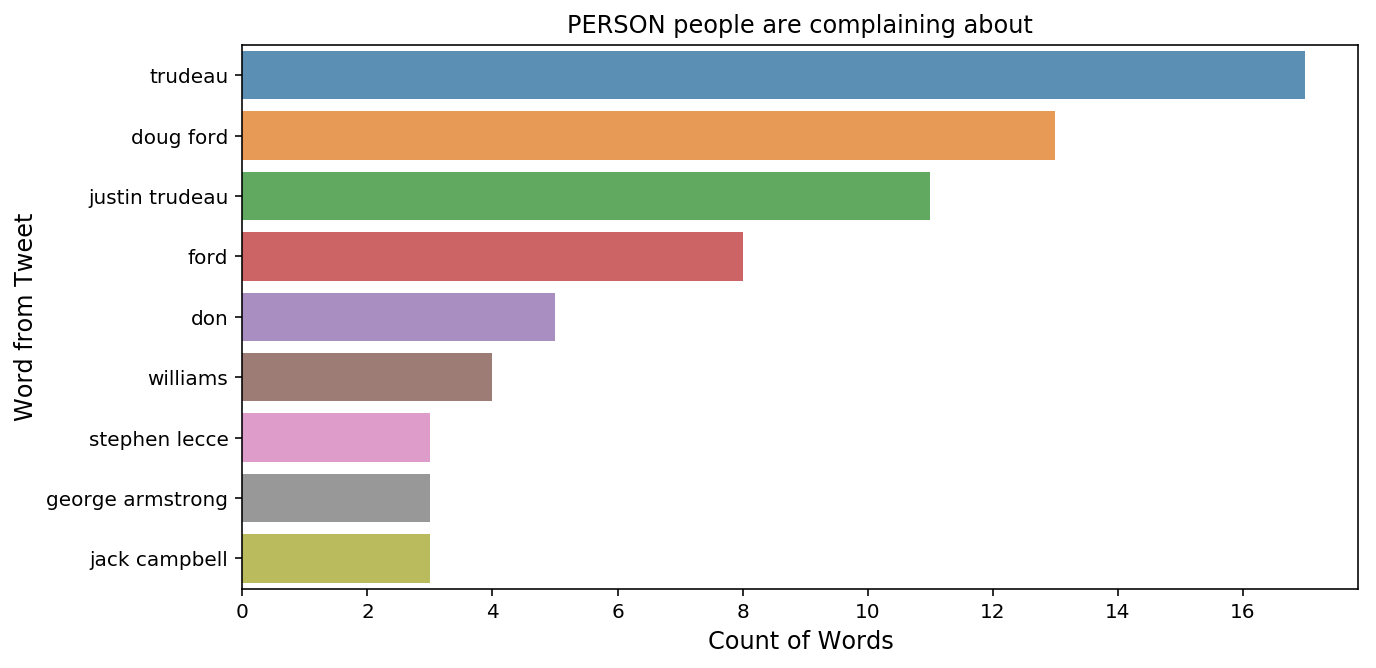

In [132]:
#Person that city of Toronto is complaining about
visualize_entity(toronto_greivance_entity, 'PERSON', 10)


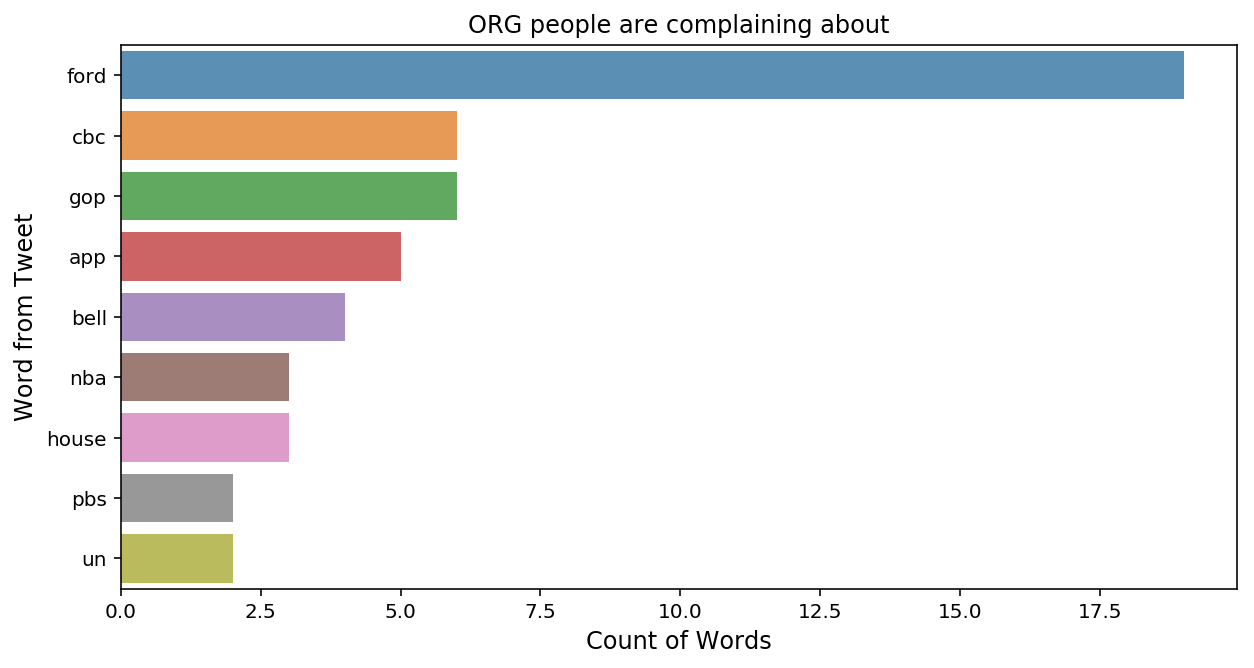

In [133]:
#Orgs that city of Toronto is complaining about
visualize_entity(toronto_greivance_entity, 'ORG', 10)

# Conlcusion
It is clear from the visualizations above that `spacy entities` are very focused. However, entities do not account for topics that were identified by LDA like `long term health` and `mental health` etc. An ideal approach to address this problem is text summarization that provides both entities and topics but until that, we will use a combination of both entity recognition and topic modelling as they both serve differnt purpose and cannot be an alternative to each other. First stpe will be extract all topics from greivances followed by entity recognition to dig deeper and get a better idea of each topic.